In [1]:
%matplotlib inline
import csv
import sys
import os
import math
import cmath
import numpy as np
import pandas as pd
from rdp import rdp
import xlrd
from xlutils.copy import copy


from matplotlib import pyplot as plt

In [2]:

def cal_ang(point_1, point_2, point_3):
    """
    根据三点坐标计算夹角
    :param point_1: 点1坐标
    :param point_2: 点2坐标
    :param point_3: 点3坐标
    :return: 返回任意角的夹角值，这里只是返回点2的夹角
    """
    a=math.sqrt((point_2[0]-point_3[0])*(point_2[0]-point_3[0])+(point_2[1]-point_3[1])*(point_2[1] - point_3[1]))
    b=math.sqrt((point_1[0]-point_3[0])*(point_1[0]-point_3[0])+(point_1[1]-point_3[1])*(point_1[1] - point_3[1]))
    c=math.sqrt((point_1[0]-point_2[0])*(point_1[0]-point_2[0])+(point_1[1]-point_2[1])*(point_1[1]-point_2[1]))
    A=math.degrees(math.acos((a*a-b*b-c*c)/(-2*b*c)))
    B=math.degrees(math.acos((b*b-a*a-c*c)/(-2*a*c)))
    C=math.degrees(math.acos((c*c-a*a-b*b)/(-2*a*b)))
#     if(B == 18.43494882292197):
#         print(point_1, point_2, point_3)
#         sys.exit()
    # 返回值保留小数点后5位
    return B

cal_ang((0,0), (0,1), (1,0))

44.999999999999986

In [3]:
# 打开文件
workbook = xlrd.open_workbook('match.xlsx')

# 查看工作表
print("sheets：" + str(workbook.sheet_names()))
# 通过文件名获得工作表,获取工作表1
table = workbook.sheet_by_name('无遮挡')
myDict = {}
for i in range(1, len(table.col_values(0))):
    myDict[table.col_values(0)[i]] = table.col_values(2)[i]
for keys,values in myDict.items():
    print(keys, values)

sheets：['无遮挡', '遮挡', 'doubleHand']
SSSM-000002 1.0
SSSM-000008 0.0
SSSM-000014 1.0
SSSM-000020 1.0
SSSM-000026 1.0
SSSM-000032 0.0
SSSM-000038 1.0
SSSM-000044 1.0
SSSM-000050 1.0
SSSM-000056 1.0
SSSM-000062 1.0
SSSM-000068 1.0
SSSM-000074 0.0
SSSM-000080 0.0
SSSM-000086 0.0
SSSM-000092 1.0
SSSM-000098 1.0
SSSM-000104 1.0
SSSM-000110 1.0
SSSM-000116 1.0
SSSM-000122 1.0
SSSM-000128 1.0
SSSM-000134 1.0
SSSM-000140 1.0
SSSM-000146 1.0
SSSM-000152 1.0
SSSM-000158 1.0
SSSM-000164 1.0
SSSM-000170 1.0
SSSM-000176 1.0
SSSM-000182 1.0
SSSM-000188 1.0
SSSM-000194 1.0
SSSM-000200 1.0
SSSM-000206 1.0
SSSM-000212 0.0
SSSM-000218 0.0
SSSM-000224 0.0
SSSM-000230 0.0
SSSM-000236 0.0
SSSM-000242 1.0
SSSM-000248 1.0
SSSM-000254 0.0
SSSM-000260 1.0
SSSM-000266 1.0
SSSM-000272 1.0
SSSM-000278 1.0
SSSM-000284 1.0
SSSM-000290 0.0
SSSM-000296 1.0
SSSM-B3-00031 1.0
SSSM-B3-00032 1.0
SSSM-B3-00033 1.0
SSSM-B3-00034 1.0
SSSM-B3-00035 1.0
SSSM-B3-00036 1.0
SSSM-B3-00037 1.0
SSSM-B3-00038 1.0
SSSM-B3-00039 1.0
SSS

./results/s1/track/double_hand/SSSM-B3-00067/standardS.csv


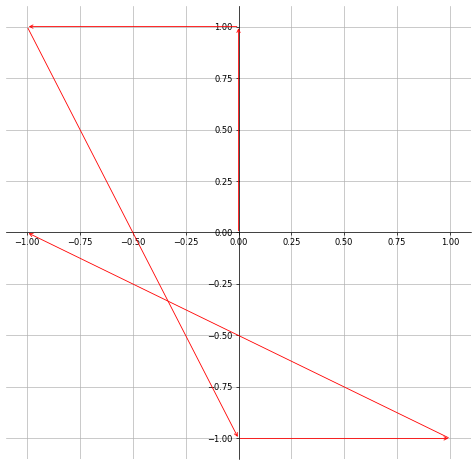

In [27]:
def arrow(filePath):
    name = filePath.split("/")[-2]
    fileType = filePath.split("/")[-1].split(".")[0]
    data = pd.read_csv(filePath)
    x = data["X"].values
    y = data["Y"].values
    plt.figure(figsize=(10,10), dpi=60)
    ax = plt.subplot(111)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))


    plt.xlim(x.min()*1.1, x.max()*1.1)

    plt.ylim(y.min()*1.1, y.max()*1.1)


    for i in range(len(x)-1):
        dx = x[i+1] - x[i]
        dy = y[i+1] - y[i]
        head_length = (dx + dy) / 20
#         plt.arrow(x[i],y[i],dx,dy,length_includes_head=True,head_width=head_length,head_length=head_length,overhang=0.6,color = 'blue')
        plt.annotate("", xy=(x[i], y[i]), xytext=(x[i+1], y[i+1]), arrowprops=dict(arrowstyle="<-", color="r"))
        plt.grid()
    
    plt.savefig(filePath.split(".")[0]+".jpg", format='png', transparent=True, dpi=300, pad_inches = 0)
    plt.show()

fileName = "SSSM-B3-00067"
resultDir = "./results/s1/track/double_hand/"
# resultPath = os.path.join(resultDir, fileName, "dp.csv")
standardPath = os.path.join(resultDir, fileName, "standardS.csv")
# arrow(resultPath)
print(standardPath)
arrow(standardPath)

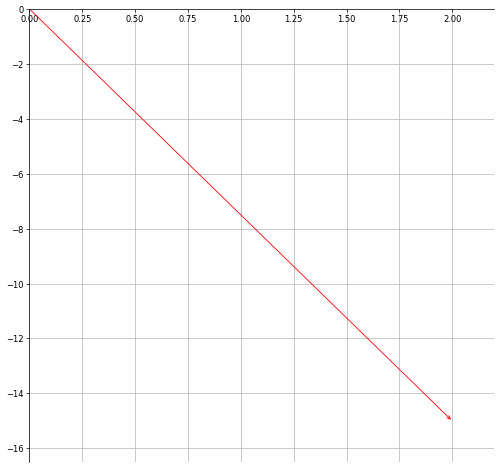

[{'frame': 0, 'X': 0, 'Y': 0}, {'frame': 371, 'X': 2, 'Y': -15}]

In [10]:
def dp(filePath):
    dir = str(filePath).rsplit("/",1)[0]
    data = pd.read_csv(filePath)
    x = data["X"].values
    y = data["Y"].values

    points = []

    for i in range(len(x)):
        point = [x[i],y[i]]
        points.append(point)

    mask = rdp(points, algo = 'iter', return_mask = True, epsilon = 8)

    rows = []
    for i in range(len(points)):
        if mask[i] == True:
            row = {"frame":i,"X":points[i][0],"Y":points[i][1]}
            rows.append(row)

    with open(dir+"/dp.csv","w") as f:
        rst_csv = csv.DictWriter(f,["frame","X","Y"])
        rst_csv.writeheader()
        rst_csv.writerows(rows)
    arrow(dir+"/dp.csv")

    return rows
# Path of csv
file = "/home/user/zy/attack-on-pattern-pin/results/s1/track/double_hand/SSSM-B3-00058/raw_trajectory.csv"
dp(file)


SSSM-B3-00034
results/s1/track/double_hand/


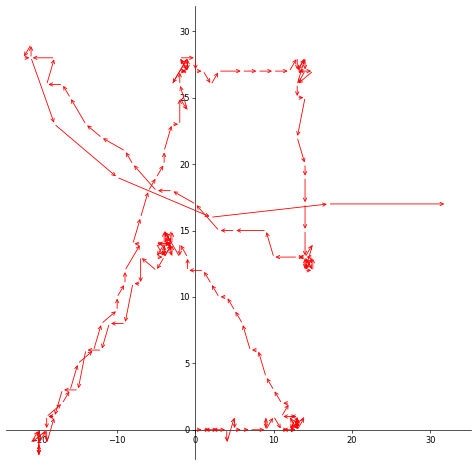

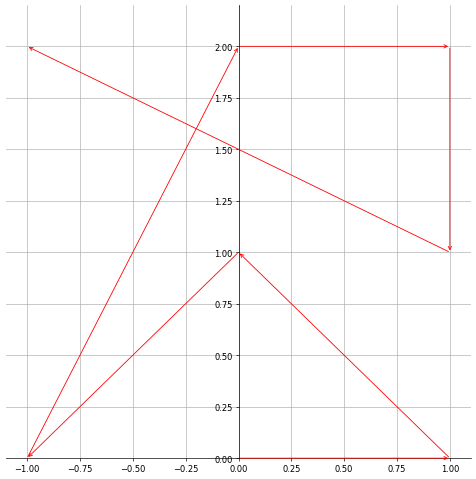

In [31]:
resultPath = "results/s1/track/double_hand/"
for roots, dirs, fileNames in os.walk(resultPath):
    dirs.sort()
    for videoName in dirs:
        if(videoName != "SSSM-B3-00034"):
            continue
        print(videoName)
        print(roots)
#         if (myDict.get(videoName) != 1):
#             continue
        filePath = os.path.join(roots, videoName, "raw_trajectory.csv")
        standardPath = os.path.join(roots, videoName, "standardS.csv")
        arrow(filePath)
        arrow(standardPath)

In [8]:
resultPath = "results/s1/"
for roots, dirs, name in os.walk(resultPath):
    dirs.sort()
    for videoName in dirs:
        if (myDict.get(videoName) != 1):
            continue
        if(videoName != "SSSM-000098"):
            continue
        test = pd.read_csv(os.path.join(roots, videoName, "dp.csv"))
        print(os.path.join(roots, videoName, "dp.csv"))
        test['score'] = 1
        test.to_csv(os.path.join(roots, videoName, "dp.csv"))

results/s1/SSSM-000098/dp.csv


In [19]:
file = "standardPattern.txt"
def removeRedundant(inList):
    pairs = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [1, 4, 7], [2, 5, 8], [3, 6, 9], [1, 5, 9], [7, 5, 3], [3, 2, 1], [6, 5, 4], [9, 8, 7], [7, 4, 1], [8, 5, 2],[9, 6, 3], [9, 5, 1], [3, 5, 7]])
    i = 0
    while(i < len(inList)-2):
        for pair in pairs:
            if (inList[i:i+3] == pair).all():
                inList = np.delete(inList, i+1)
                break
        i = i + 1
    return inList

def pat(file):
    f = open(file)   
    pats = f.readlines()

    passwordMap = [ (-1,1),(0,1),(1,1),
                    (-1,0),(0,0),(1,0),
                    (-1,-1),(0,-1),(1,-1)]
    for pat in pats:
#         print(pat)
        name = pat.split("\t")[0]
#         if(name != 'SSSM-000098'):
#             continue
        print(name)
        pat = pat.split("\t")[1].split("-->")
        pat = removeRedundant(list(map(int, pat)))
        print(pat)
        temp = []
        x = []
        y = []
        firstX = passwordMap[int(pat[0])-1][0]
        firstY = passwordMap[int(pat[0])-1][1]
        for p in pat:
            x.append(passwordMap[int(p)-1][0] - firstX)
            y.append(passwordMap[int(p)-1][1] - firstY)
        dataframe = pd.DataFrame({'X':x,'Y':y})
        if(name in os.listdir("results/s1/track/double_hand")):
            path = os.path.join("results/s1/track/double_hand", name, "standardS.csv")
            print(path)
            dataframe.to_csv(path)
#         elif(name in os.listdir("results/s2/")):
#             dataframe.to_csv(os.path.join("results/s2", name, "standardS.csv"))


In [20]:
pat(file)
# print(os.listdir("results/s1/track/double_hand/"))

SSSM-000002
[4, 5, 7, 8]
SSSM-000008
[4, 5, 7, 8]
SSSM-000014
[4, 5, 7, 8]
SSSM-000020
[4, 5, 7, 8]
SSSM-000026
[4, 5, 7, 8]
SSSM-000032
[1 2 8 9]
SSSM-000038
[1 2 8 9]
SSSM-000044
[1 2 8 9]
SSSM-000050
[1 2 8 9]
SSSM-000056
[1 2 8 9]
SSSM-000062
[1 3 9 8]
SSSM-000068
[1 3 9 8]
SSSM-000074
[1 3 9 8]
SSSM-000080
[1 3 9 8]
SSSM-000086
[1 3 9 8]
SSSM-000092
[2 8 9 3]
SSSM-000098
[2 8 9 3]
SSSM-000104
[2 8 9 3]
SSSM-000110
[2 8 9 3]
SSSM-000116
[2 8 9 3]
SSSM-000122
[1 3 7 9]
SSSM-000128
[1 3 7 9]
SSSM-000134
[1 3 7 9]
SSSM-000140
[1 3 7 9]
SSSM-000146
[1 3 7 9]
SSSM-000152
[3 1 7 9]
SSSM-000158
[3 1 7 9]
SSSM-000164
[3 1 7 9]
SSSM-000170
[3 1 7 9]
SSSM-000176
[3 1 7 9]
SSSM-000182
[1 7 9 3 2]
SSSM-000188
[1 7 9 3 2]
SSSM-000194
[1 7 9 3 2]
SSSM-000200
[1 7 9 3 2]
SSSM-000206
[1 7 9 3 2]
SSSM-000212
[2, 7, 6, 1, 8, 3, 4, 9]
SSSM-000218
[2, 7, 6, 1, 8, 3, 4, 9]
SSSM-000224
[2, 7, 6, 1, 8, 3, 4, 9]
SSSM-000230
[2, 7, 6, 1, 8, 3, 4, 9]
SSSM-000236
[2, 7, 6, 1, 8, 3, 4, 9]
SSSM-000242
[1 4 2 7

In [44]:
# 把结果保存到总表中
def getData(resultPath):
    videoName = resultPath.split("/")[-1]
    dpCsvPath = os.path.join(resultPath, "dp.csv")
    StandardCsvPath = os.path.join(resultPath, "standardS.csv")
    try:
        data = pd.read_csv(dpCsvPath)
    except(IOError):
        print("no dp.csv found.")
    try:
        dataS = pd.read_csv(StandardCsvPath,index_col=0)
    except(IOError):
        print("no standard.csv found.")
    assert len(data) == len(dataS)

    # 实际值
    distance = []
    angle = []
    time = []
    # 准确值（理论值）
    standardD = []
    standardAngle = []
    for i in range(len(data) - 1):
        t = data['frame'][i + 1] - data['frame'][i]
        d = math.sqrt(abs(data['X'][i+1]-data['X'][i])**2 + abs(data['Y'][i+1]-data['Y'][i])**2)
        sd = math.sqrt(abs(dataS['X'][i+1]-dataS['X'][i])**2 + abs(dataS['Y'][i+1]-dataS['Y'][i])**2)
        distance.append(d)
        standardD.append(sd)
        time.append(t)
    for i in range(len(data) - 2):
        firstPoint = [data['X'][i], data['Y'][i]]
        secondPoint = [data['X'][i+1], data['Y'][i+1]]
        thirdPoint = [data['X'][i+2], data['Y'][i+2]]
        angle.append(cal_ang(firstPoint, secondPoint, thirdPoint))
        firstPoint = [dataS['X'][i], dataS['Y'][i]]
        secondPoint = [dataS['X'][i+1], dataS['Y'][i+1]]
        thirdPoint = [dataS['X'][i+2], dataS['Y'][i+2]]
        standardAngle.append(cal_ang(firstPoint, secondPoint, thirdPoint))
    angle.append(-1)
    standardAngle.append(-1)
#     print(angle, standardAngle)
    
    normD = list(map(lambda x:x / distance[0] * standardD[0], distance))
    return(normD, standardD, angle,standardAngle)
result = getData("./results/s1/SSSM-B3-00046/")

print("normed distance: \n{}\n\nstandardDistance: \n{}\n\nangle:\n{}\n\nstandard angle:\n{}\n" \
      .format(result[0], result[1], result[2], result[3]))

normed distance: 
[2.23606797749979, 1.7266767617030132, 2.6632568037975566, 3.1285945869062886, 2.76529205486489, 1.7245224542369073, 2.4342659176065413]

standardDistance: 
[2.23606797749979, 1.4142135623730951, 2.23606797749979, 2.8284271247461903, 2.23606797749979, 1.4142135623730951, 2.23606797749979]

angle:
[16.271237979793757, 63.807801127034594, 17.125281921838837, 19.034434354835188, 59.03624346792648, 22.93210043758977, -1]

standard angle:
[18.434948822921974, 71.56505117707799, 18.434948822921974, 18.434948822921974, 71.56505117707799, 18.434948822921974, -1]



In [41]:
file = "standardPattern.txt"
standardPath = "results/s1/"
resultPath = "results/no-end/"
videoNames = []
routes = []
standardDs = []
actualDs = []
actualAs = []
standardAs = []
f = open(file)   
pats = f.readlines()
for roots, dirs, fileNames in os.walk(standardPath):
    for dir in dirs:
        if(dir != "SSSM-000134"):
            continue
        if (myDict.get(dir) != 1):
            continue
        filePath = os.path.join(roots, dir)
        normD, standardD, angle, standardAngle = getData(filePath, os.path.join(resultPath, dir))
        for pat in pats:
            if pat.split("\t")[0] == dir:
                route = pat.split("\t")[1]
                break
        for i in range(len(normD)):
            videoNames.append(dir)
            routes.append(route)
            actualDs.append(normD[i])
            standardDs.append(standardD[i])
            actualAs.append(angle[i])
            standardAs.append(standardAngle[i])
            
print(len(videoNames))
print(len(routes))     
print(len(standardDs))
print(len(actualDs))
print(len(standardAs))
print(len(actualAs))
dataframe = pd.DataFrame({'video number':videoNames,\
                          'route':routes,\
                          'standard distances':standardDs,\
                          'actual distances':actualDs,\
                          'standard angles':standardAs,\
                          'actual angles':actualAs})
dataframe.to_csv(os.path.join("总表2.csv"))

AssertionError: 

In [21]:

resultPath = os.path.join("总表.csv")
try:
    data = pd.read_csv(resultPath)
except(IOError):
    print("no 总表.csv found.")
print("spearman相关度")
print("距离相关度: {}".format(data['actual distances'].corr(data['standard distances'],method='spearman')))
print("角度相关度: {}".format(data['actual angles'].corr(data['standard angles'],method='spearman')))
print("距离和角度相关度: {}".format(data['actual distances'].corr(data['actual angles'],method='spearman')))
print("kendall相关度")
print("距离相关度: {}".format(data['actual distances'].corr(data['standard distances'],method='kendall')))
print("角度相关度: {}".format(data['actual angles'].corr(data['standard angles'],method='kendall')))
print("距离和角度相关度: {}".format(data['actual distances'].corr(data['actual angles'],method='kendall')))


spearman相关度
距离相关度: 0.810899157771851
角度相关度: 0.9785986046944151
距离和角度相关度: -0.08683646619110866
kendall相关度
距离相关度: 0.668591057705971
角度相关度: 0.905231902785451
距离和角度相关度: -0.05967547094477177


SSSM-000002


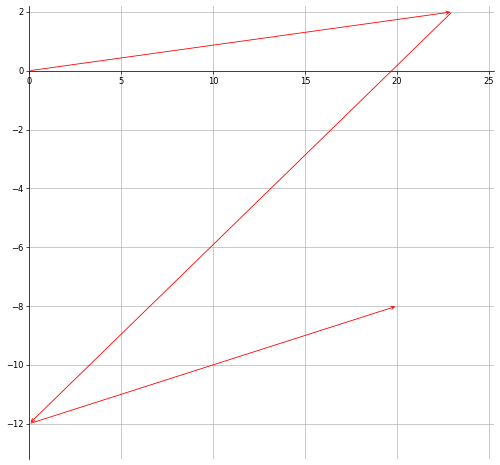

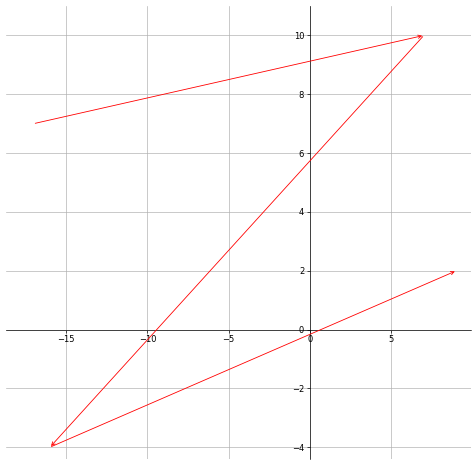

SSSM-000008


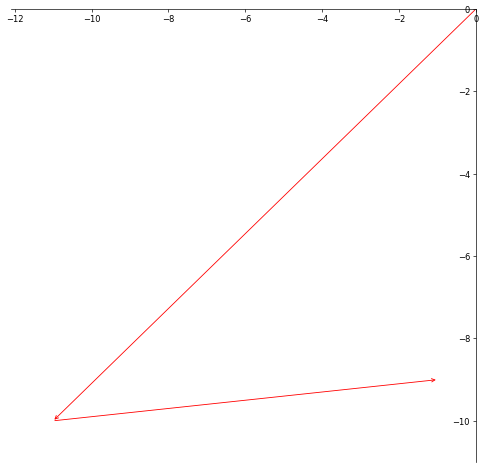

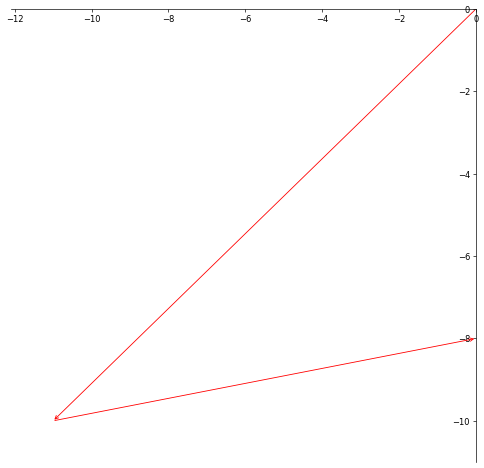

SSSM-000014


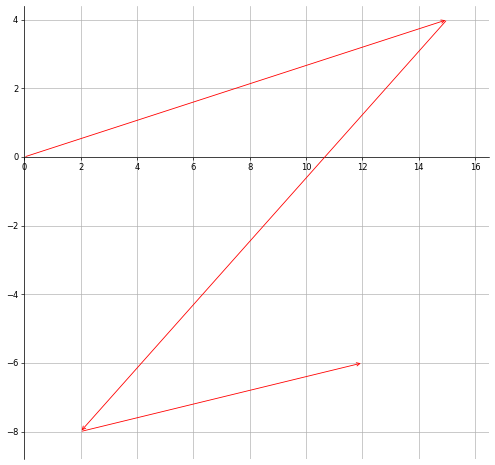

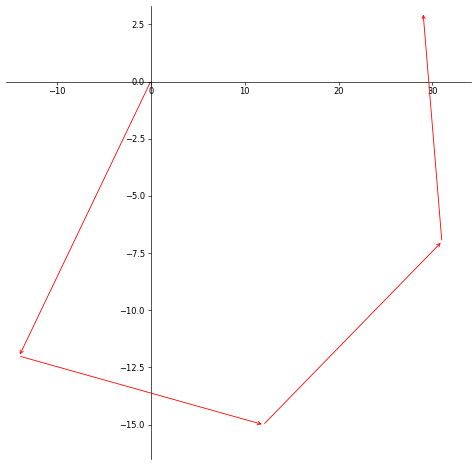

SSSM-000020


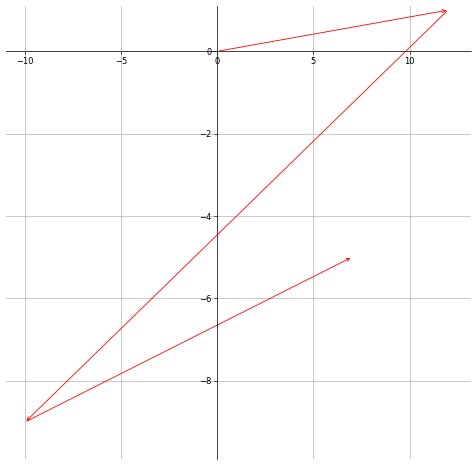

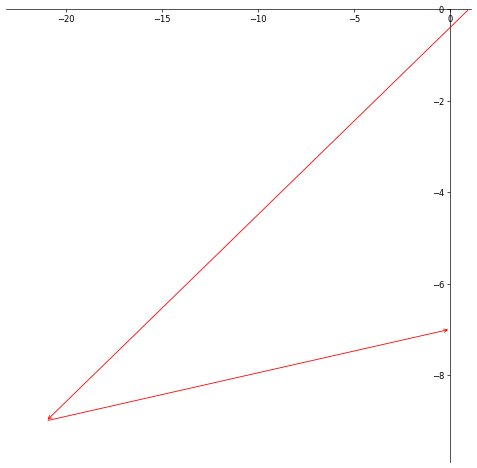

SSSM-000026


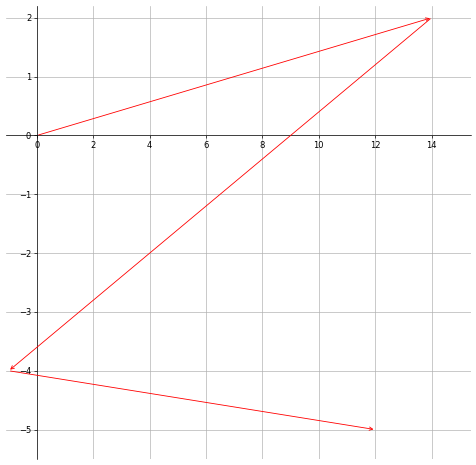

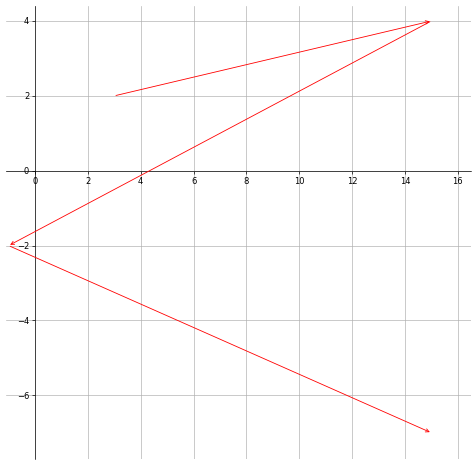

SSSM-000038


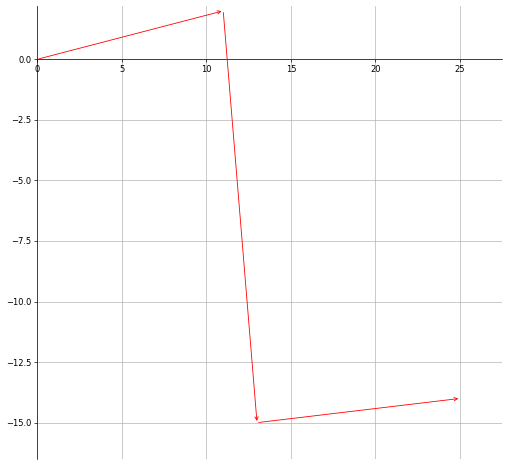

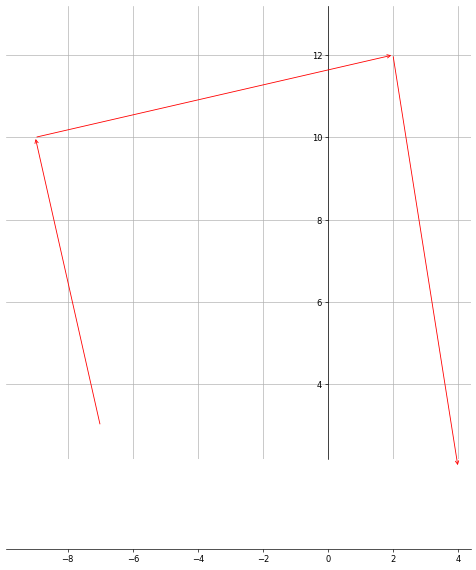

SSSM-000044


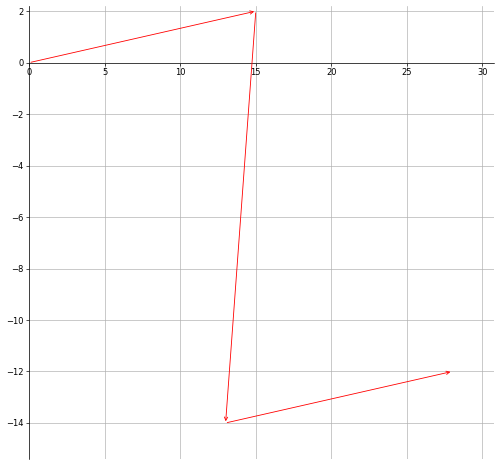

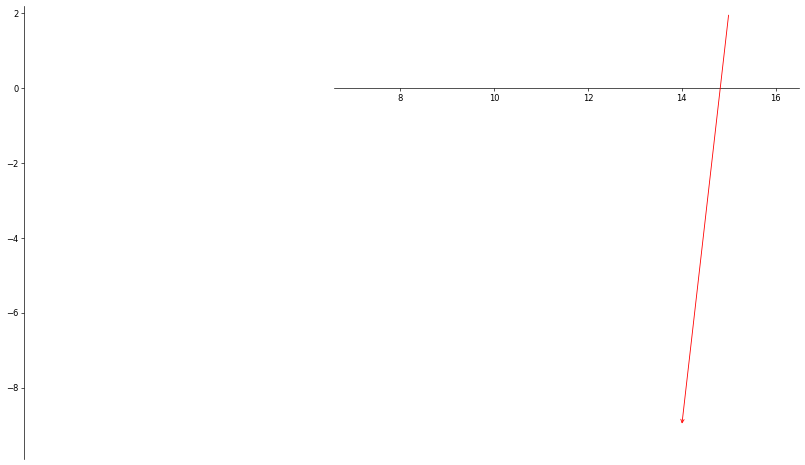

SSSM-000050


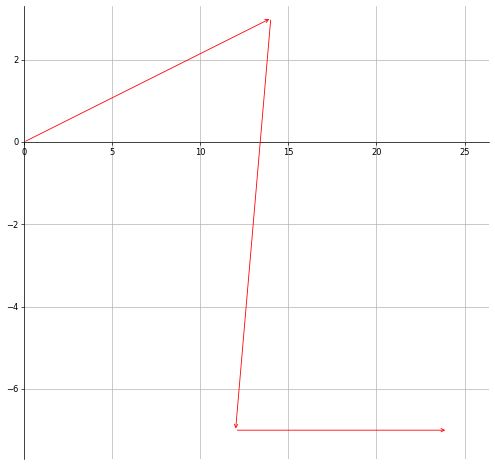

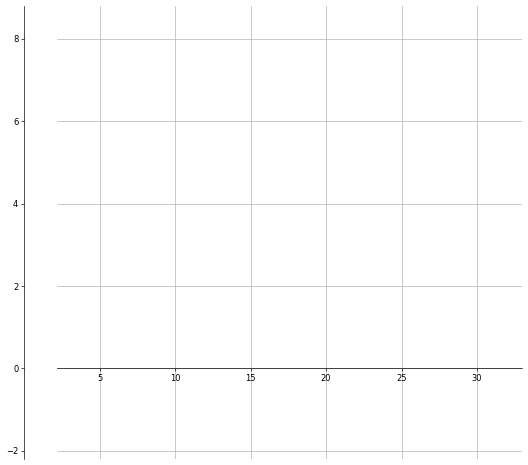

SSSM-000056


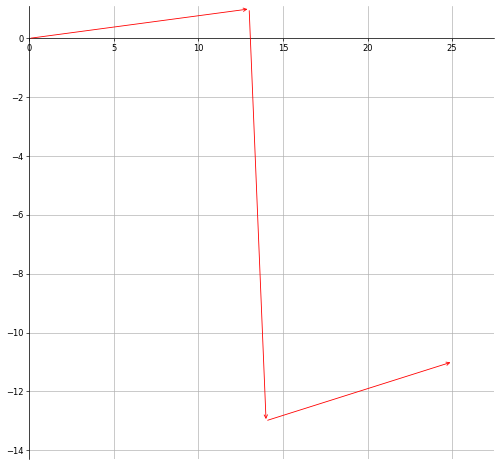

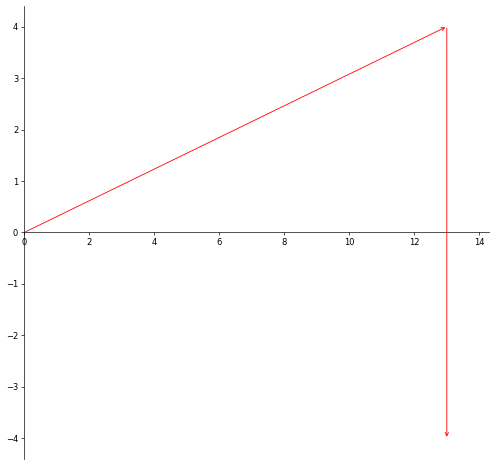

SSSM-000062


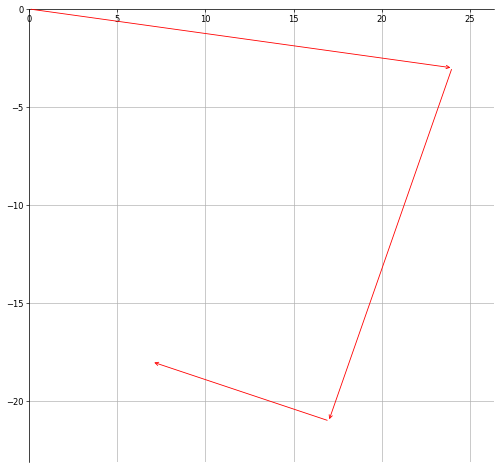

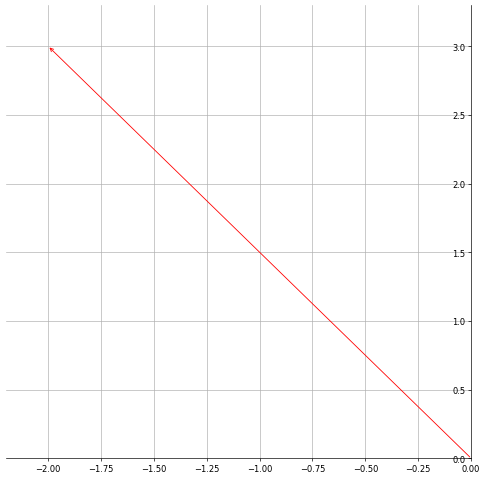

SSSM-000068


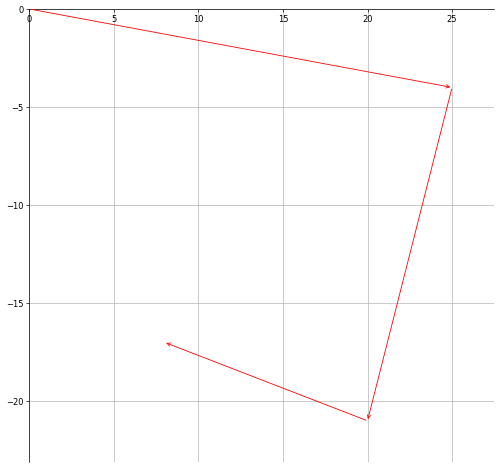

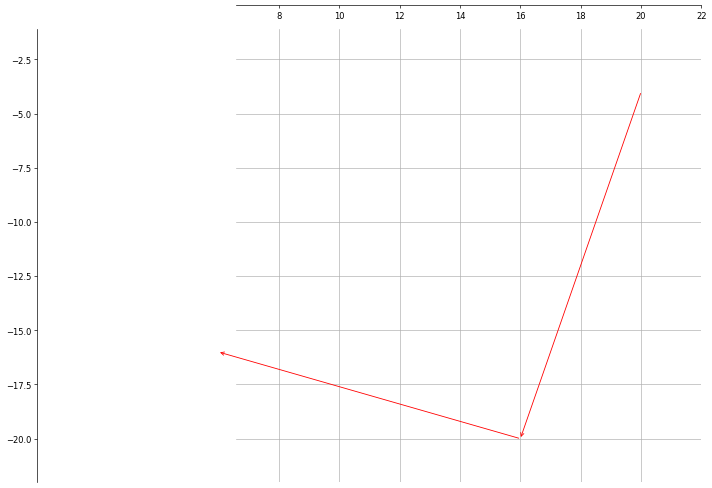

SSSM-000074
SSSM-000080


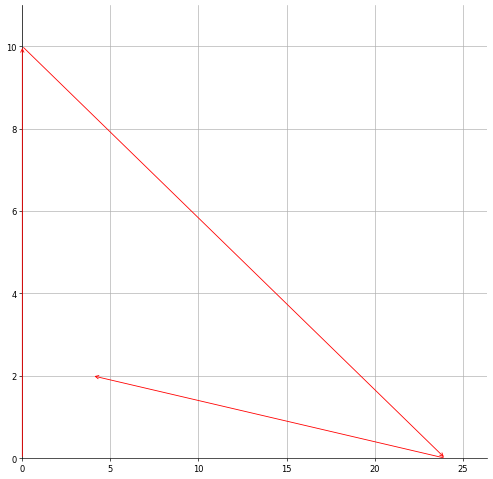

/home/user/anaconda3/envs/tensorflow-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Attempting to set identical bottom == top == 1.1 results in singular transformations; automatically expanding.


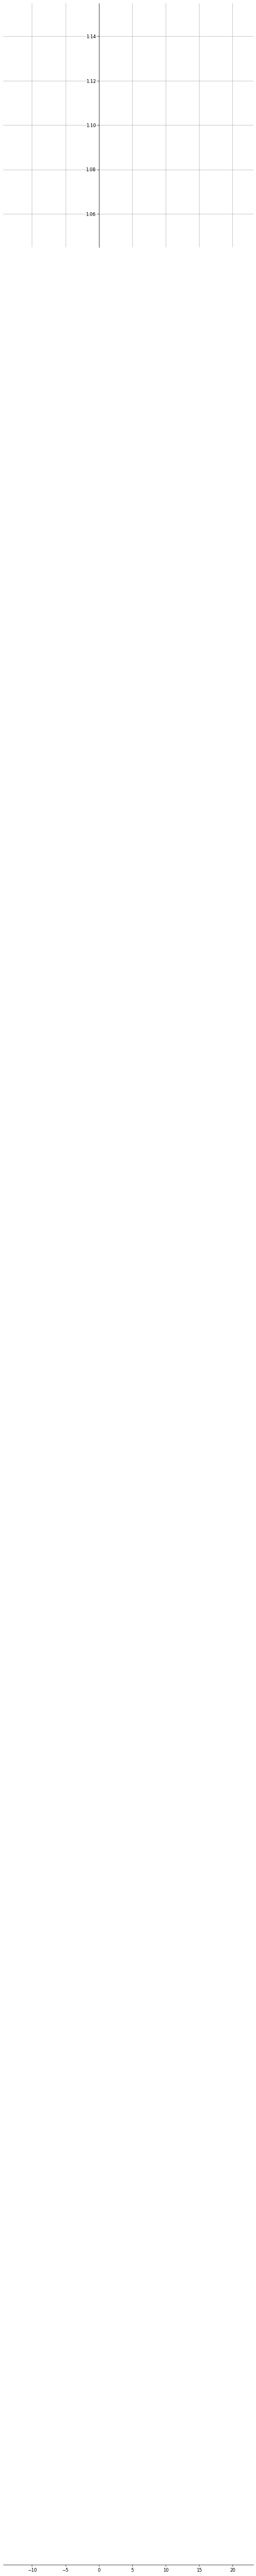

SSSM-000086


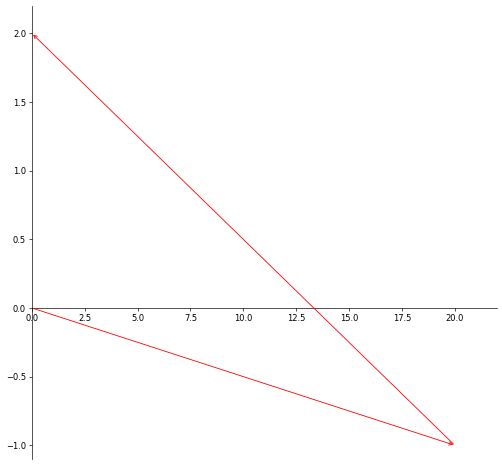

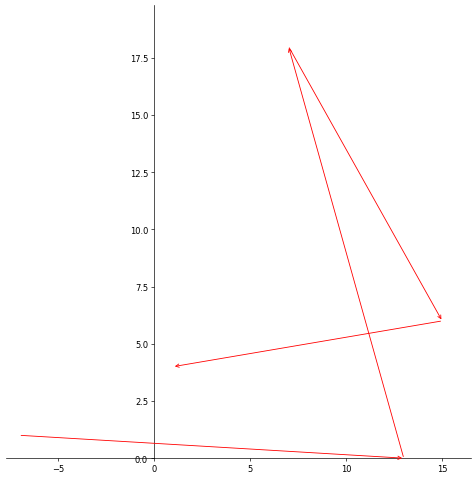

SSSM-000092


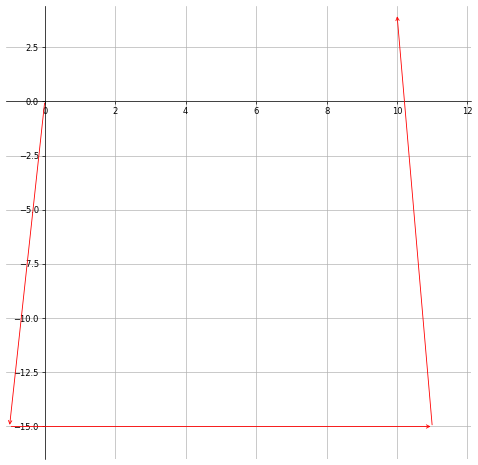

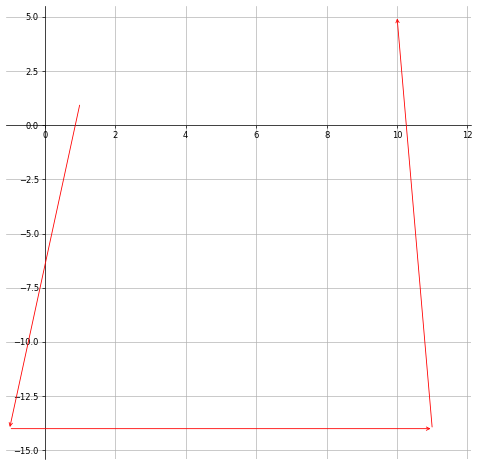

SSSM-000098


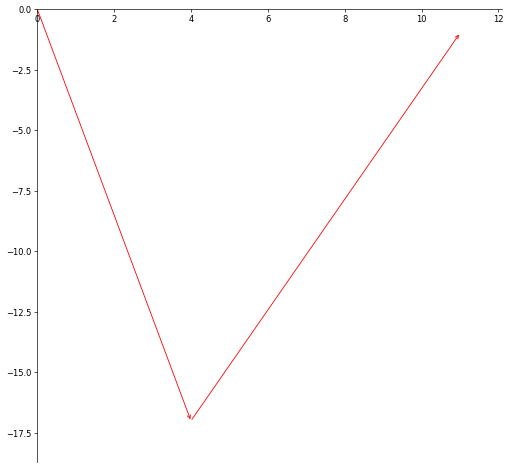

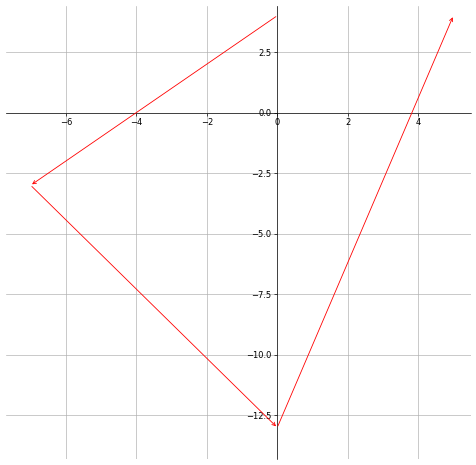

SSSM-000104


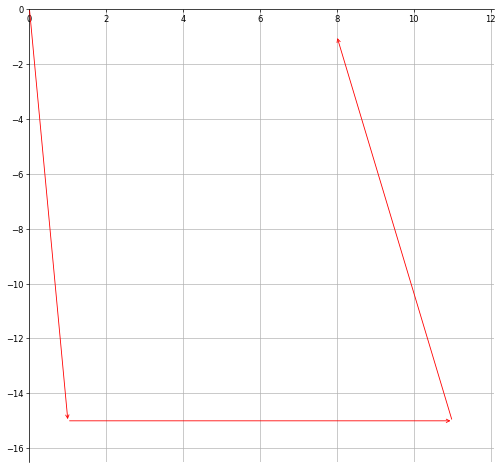

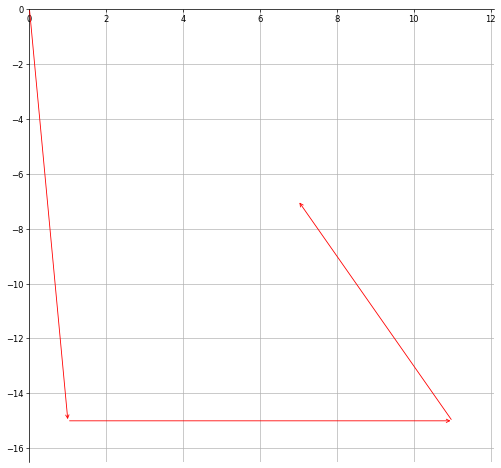

SSSM-000110


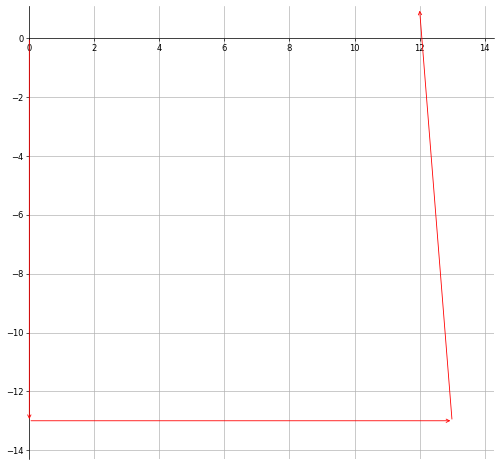

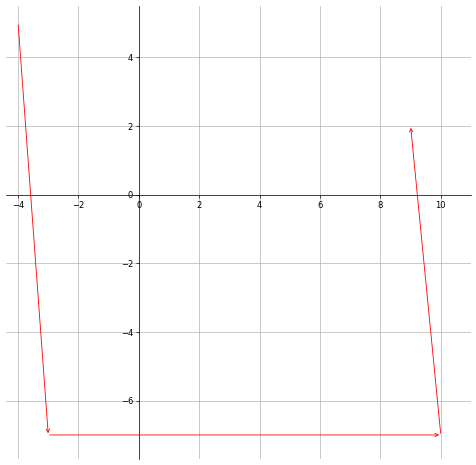

SSSM-000116


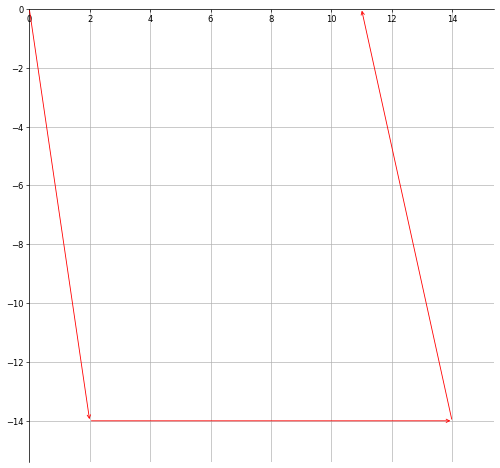

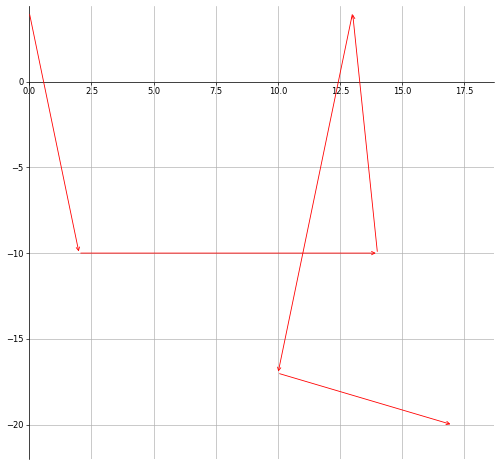

SSSM-000122


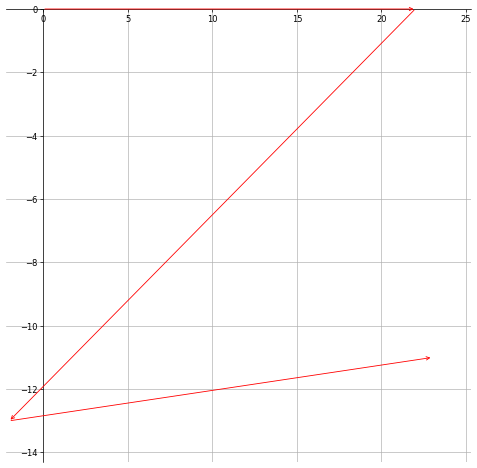

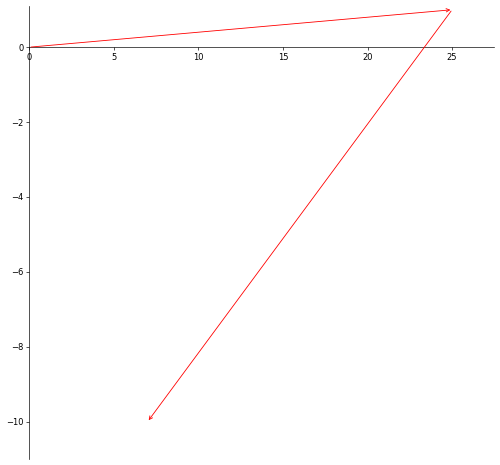

SSSM-000128


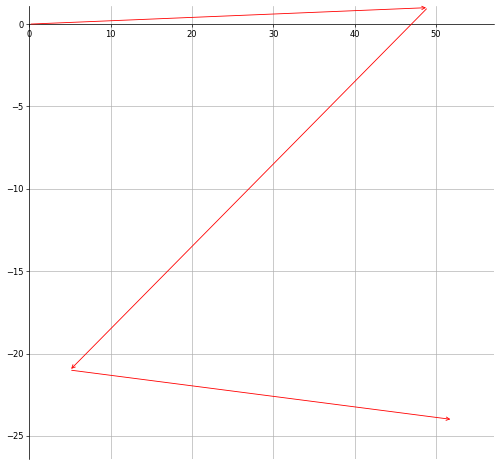

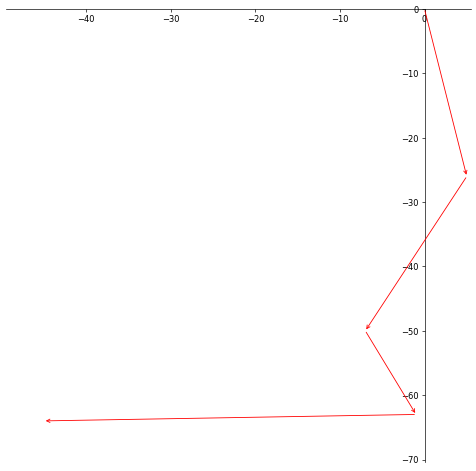

SSSM-000134


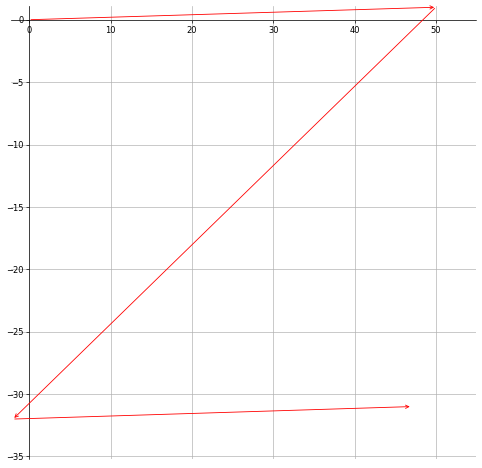

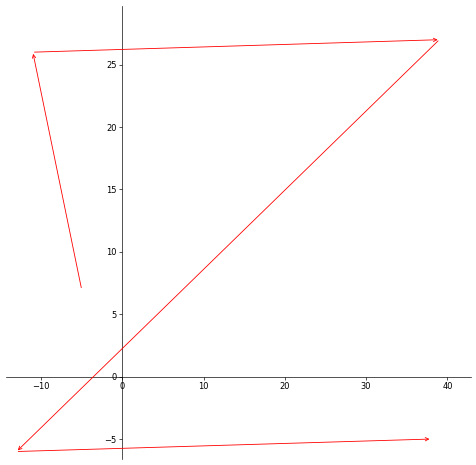

SSSM-000140


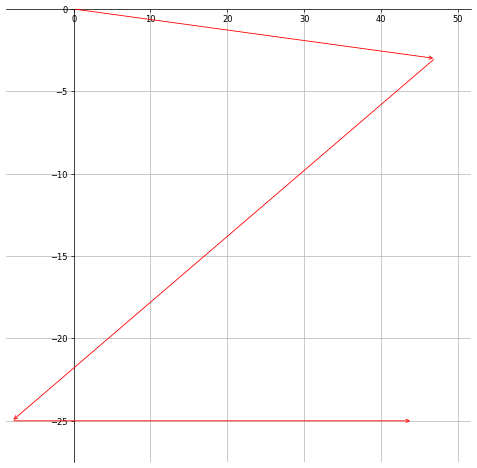

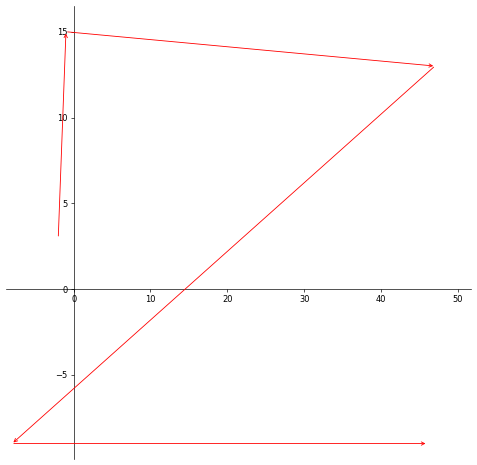

SSSM-000146


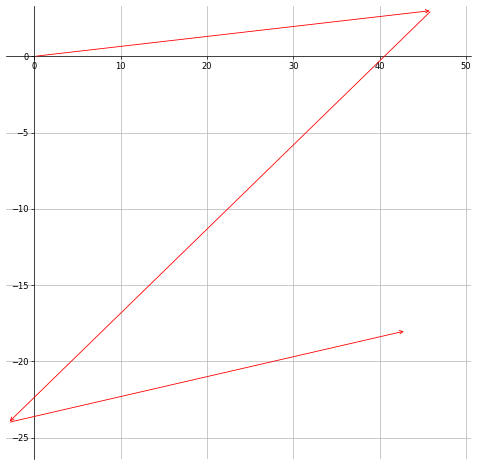

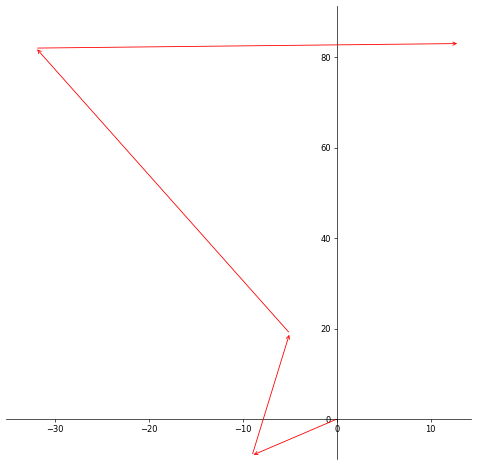

SSSM-000152


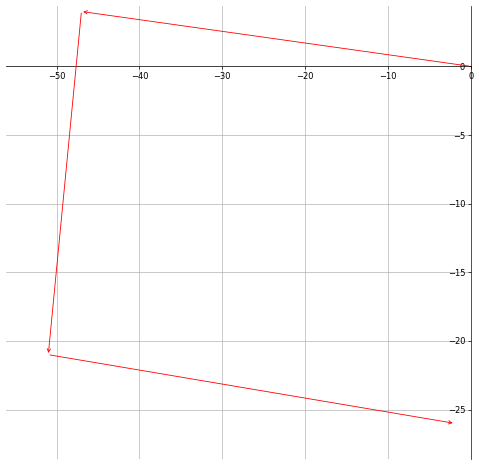

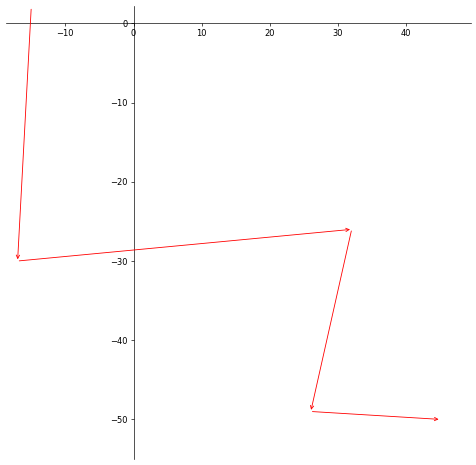

SSSM-000158


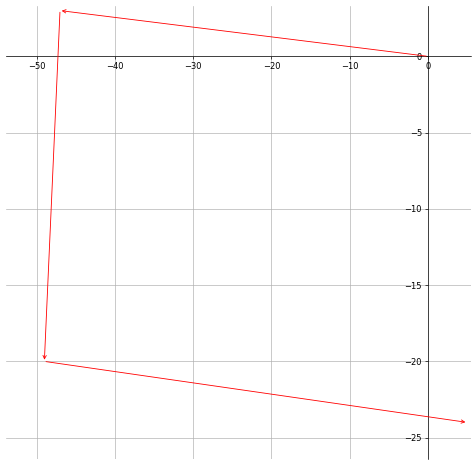

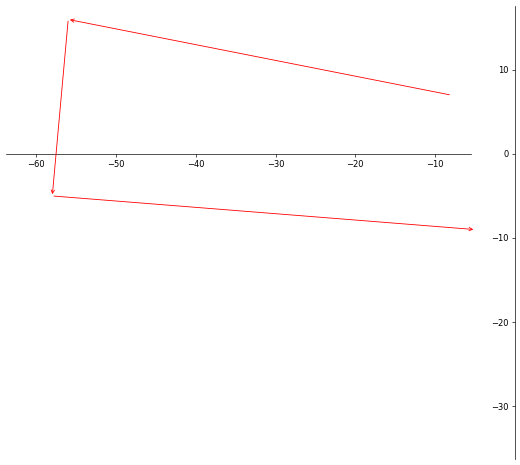

SSSM-000164


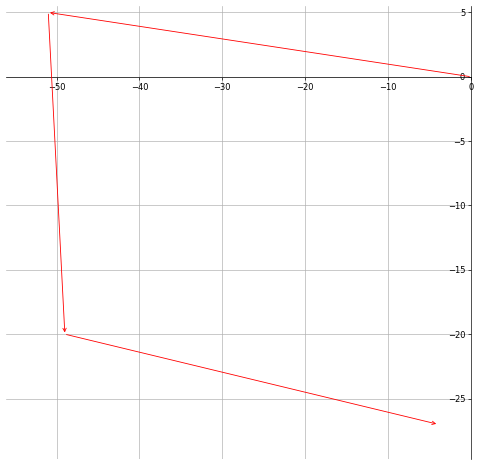

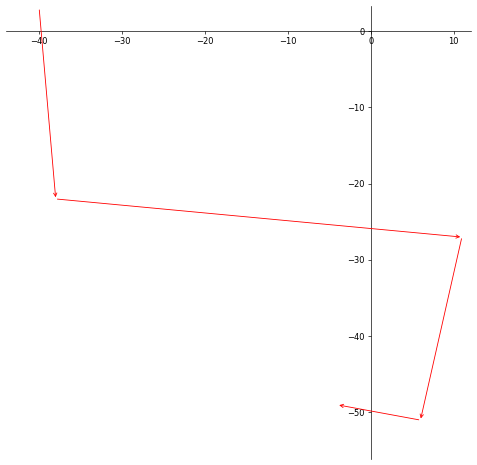

SSSM-000170


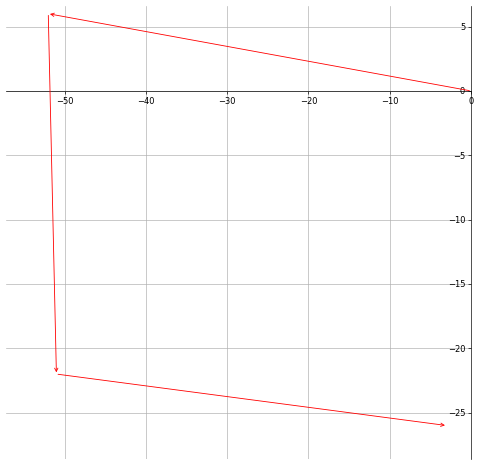

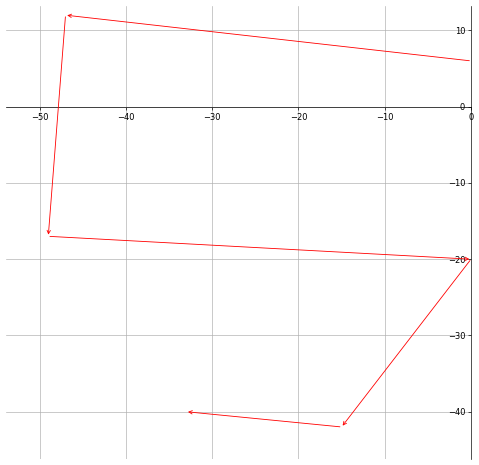

SSSM-000176


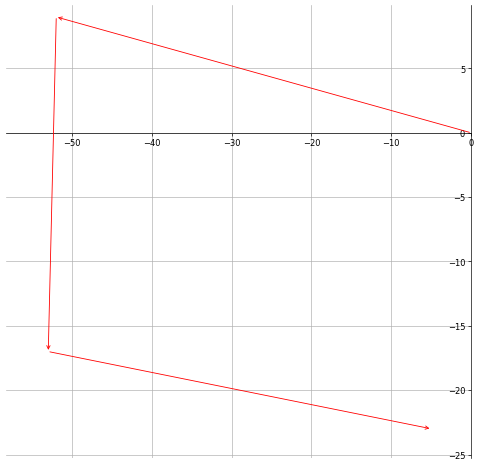

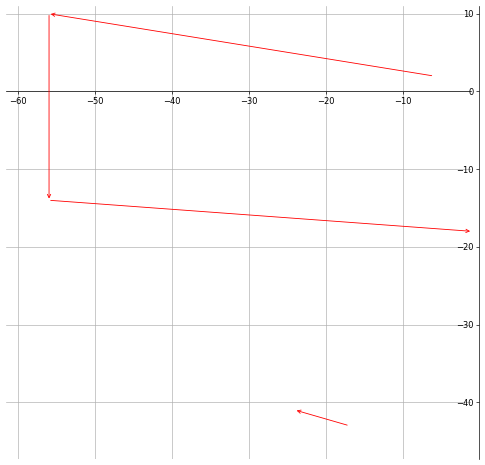

SSSM-000182


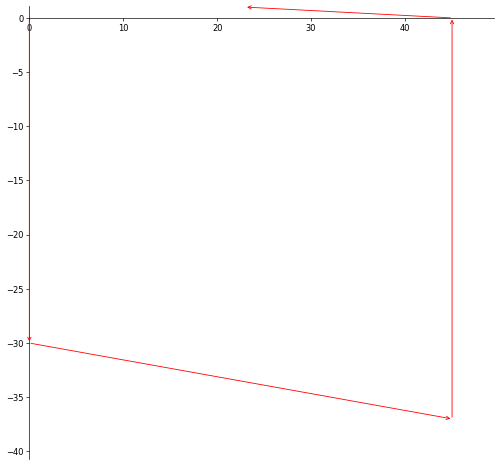

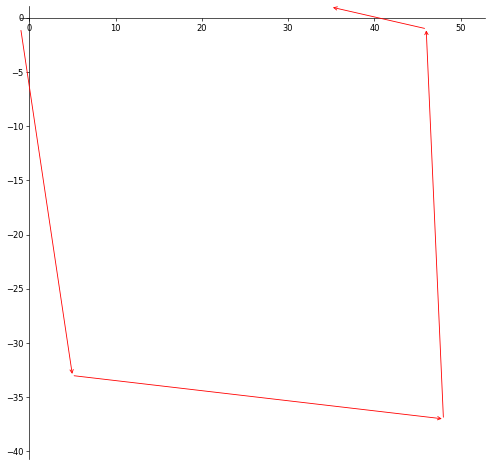

SSSM-000188


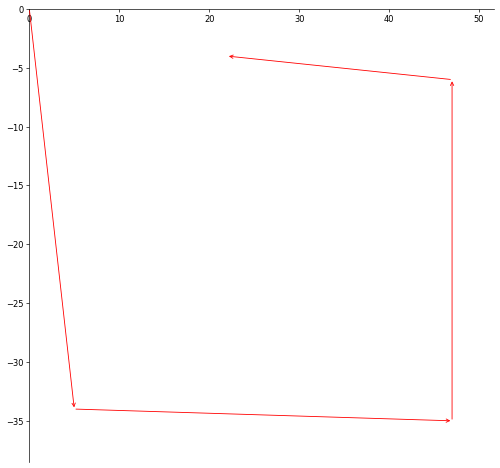

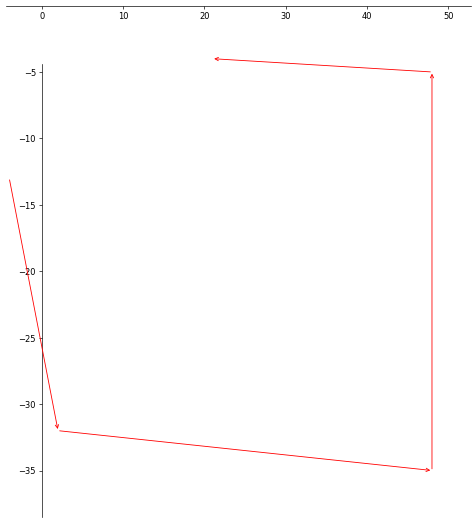

SSSM-000194


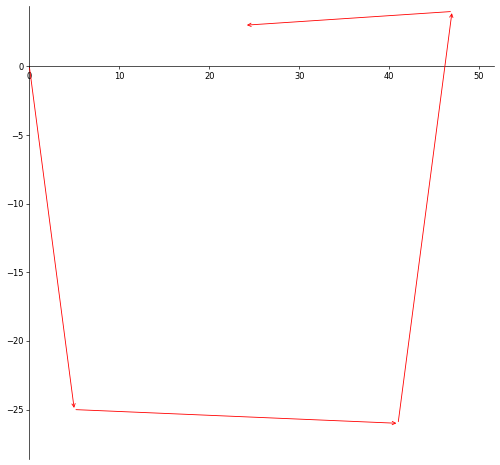

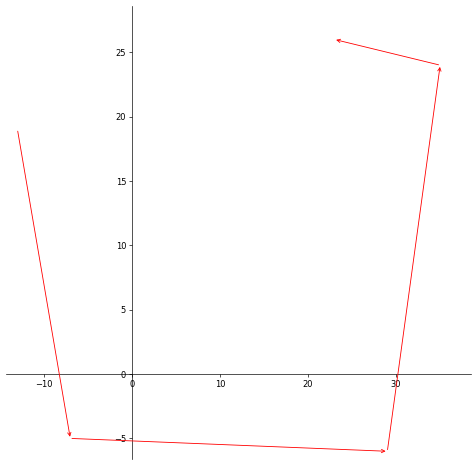

SSSM-000200


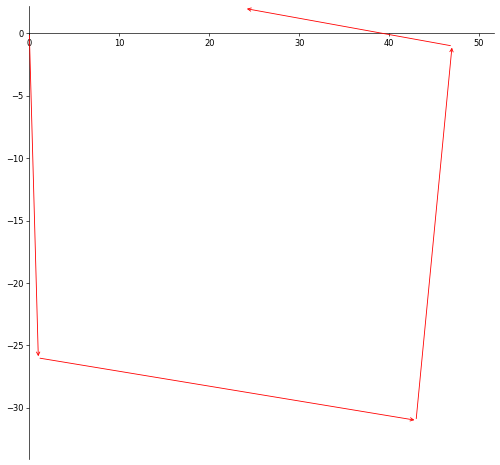

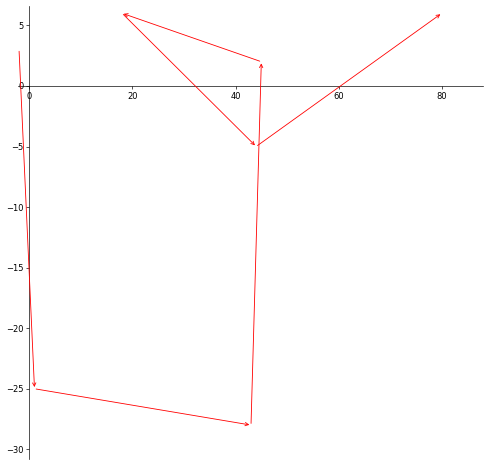

SSSM-000206


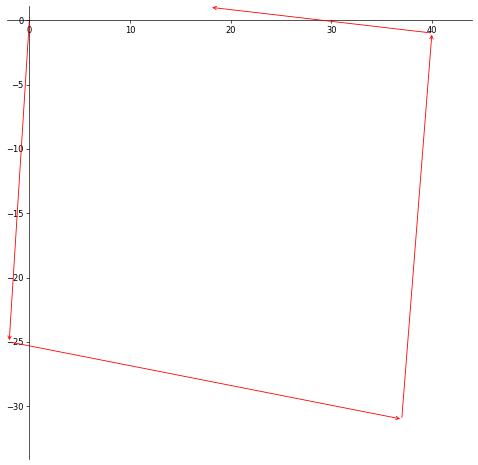

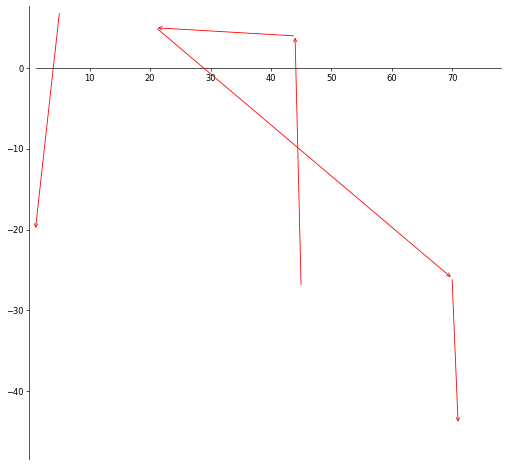

SSSM-000212


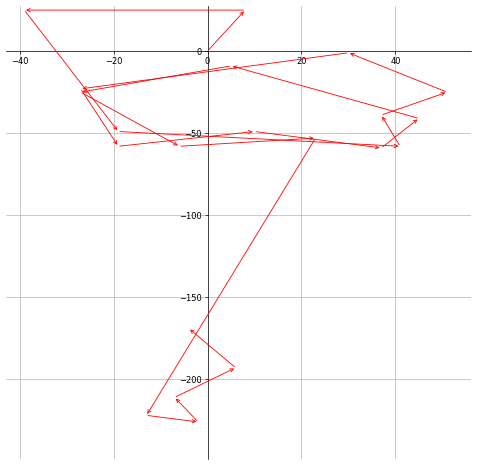

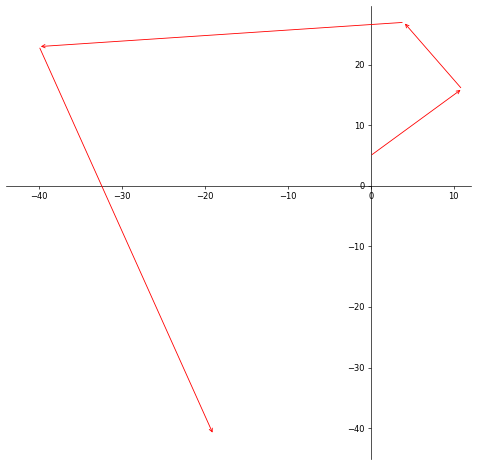

SSSM-000218


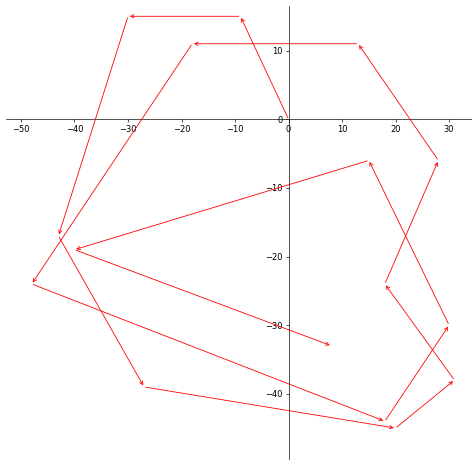

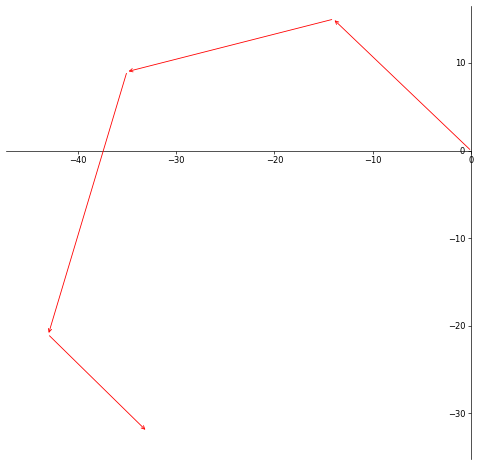

SSSM-000224


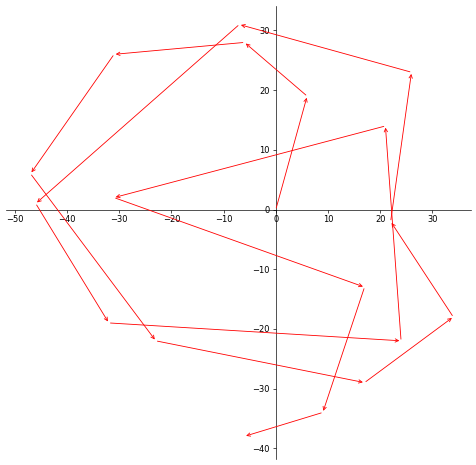

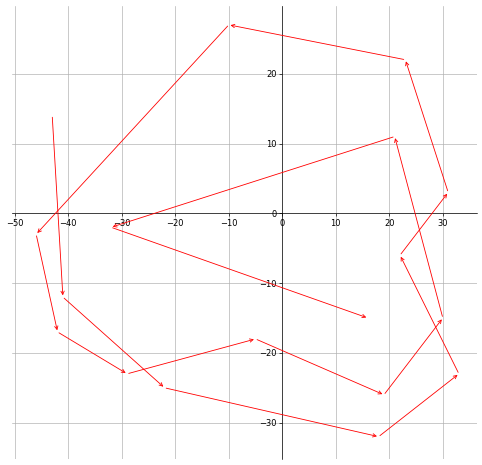

SSSM-000230


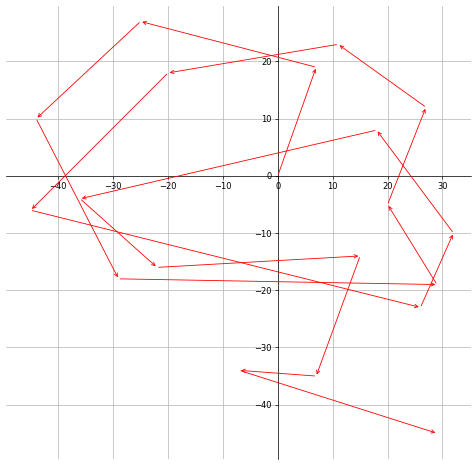

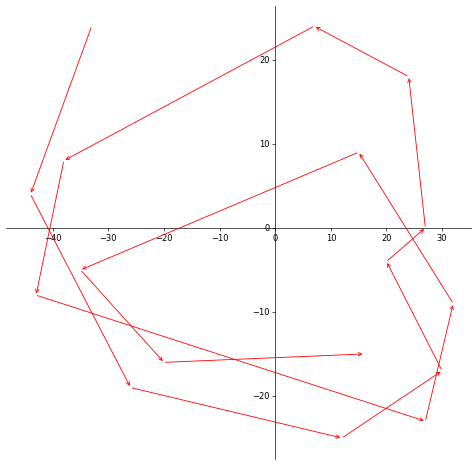

SSSM-000236


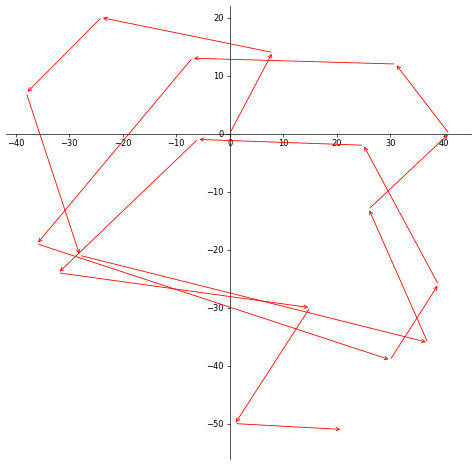

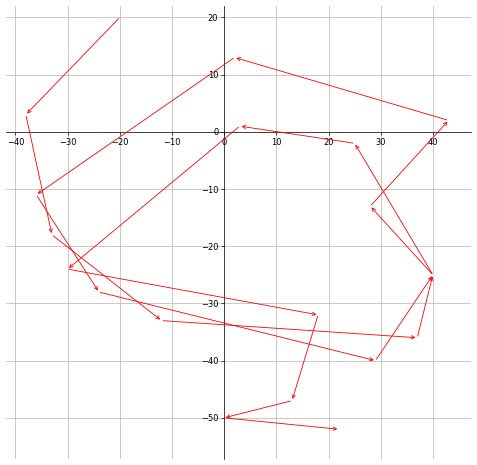

SSSM-000242


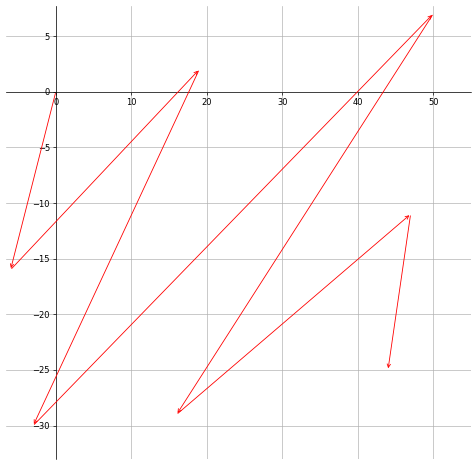

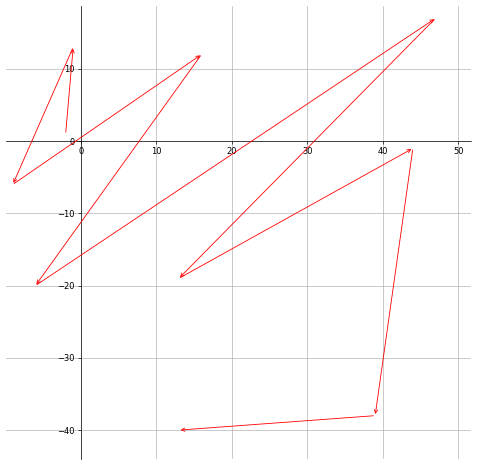

SSSM-000248


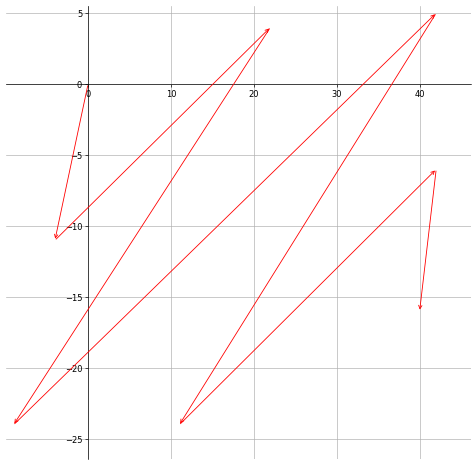

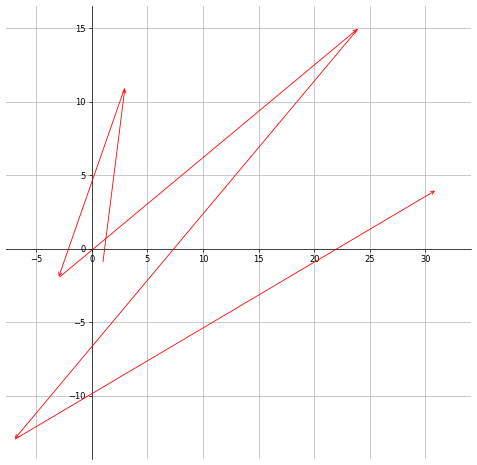

SSSM-000254


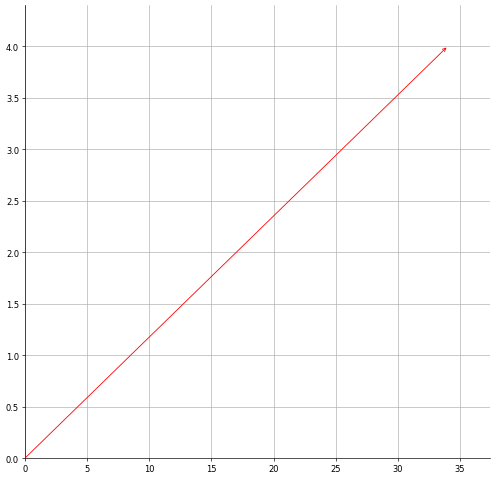

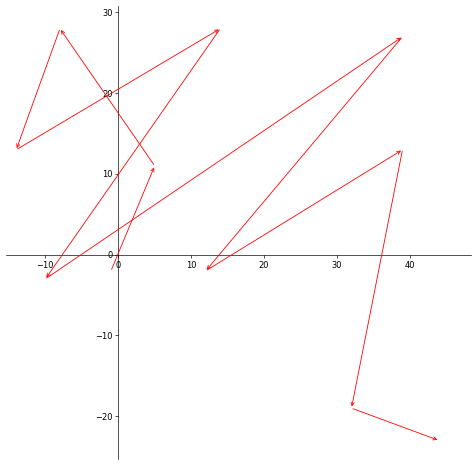

SSSM-000260


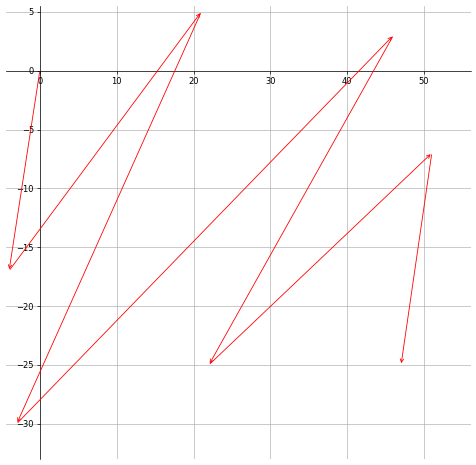

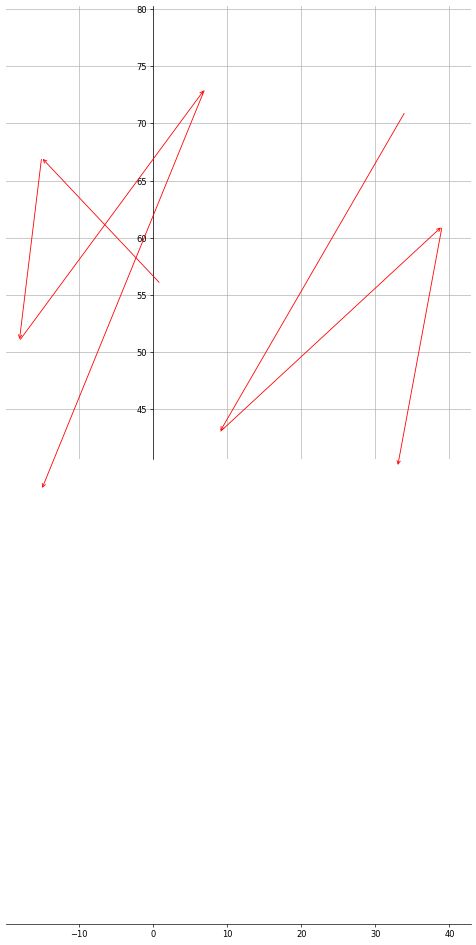

SSSM-000266


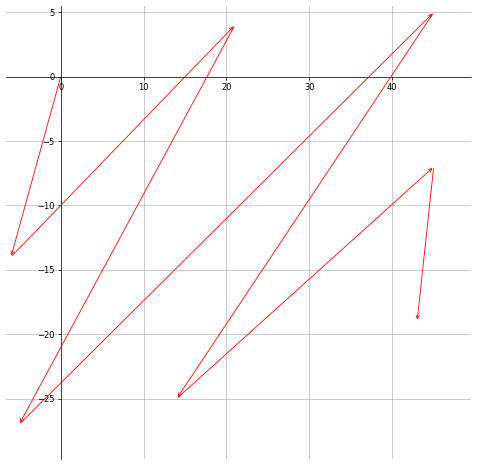

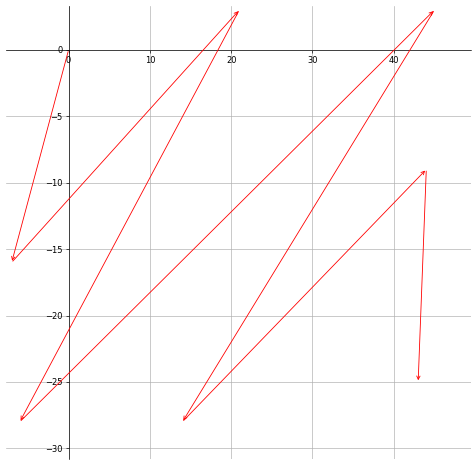

SSSM-000272


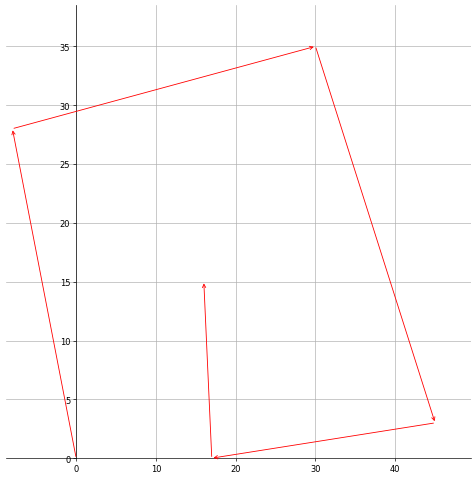

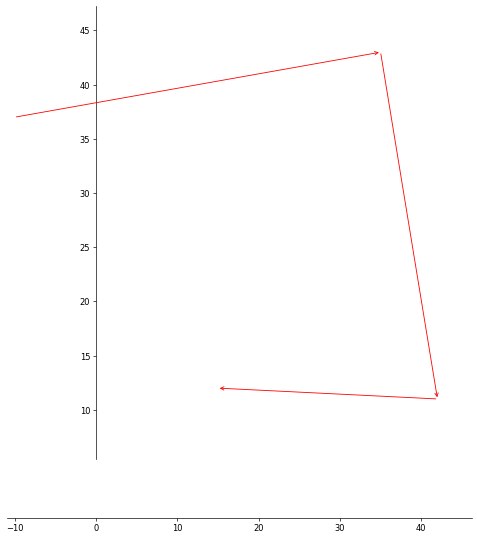

SSSM-000278


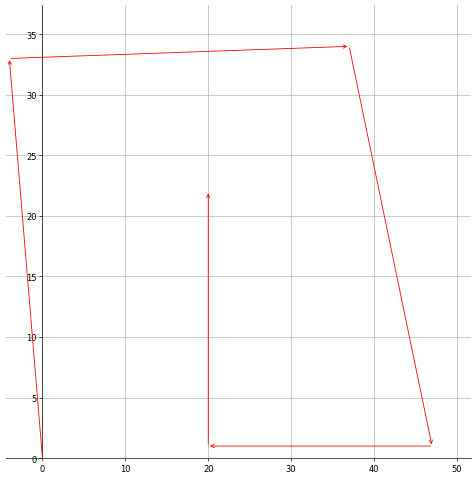

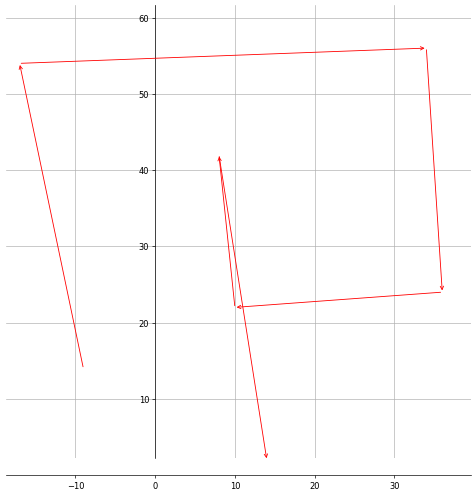

SSSM-000284


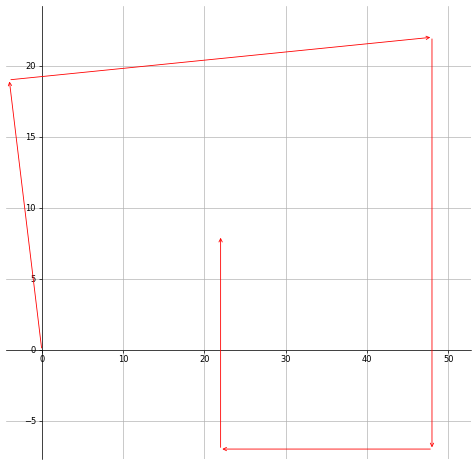

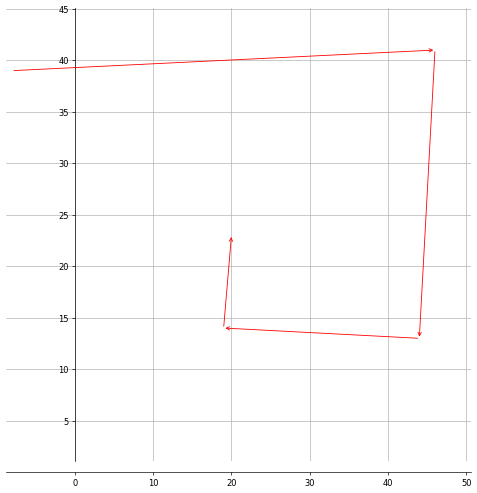

SSSM-000290


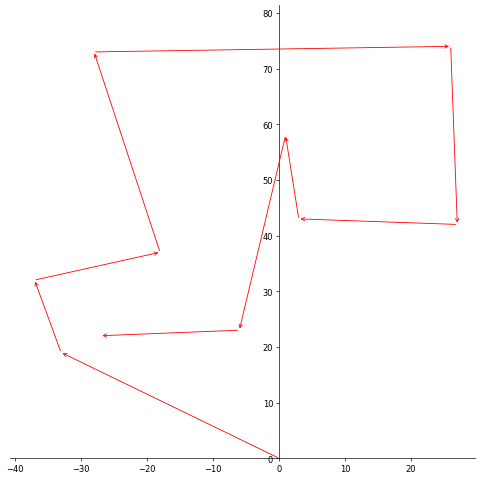

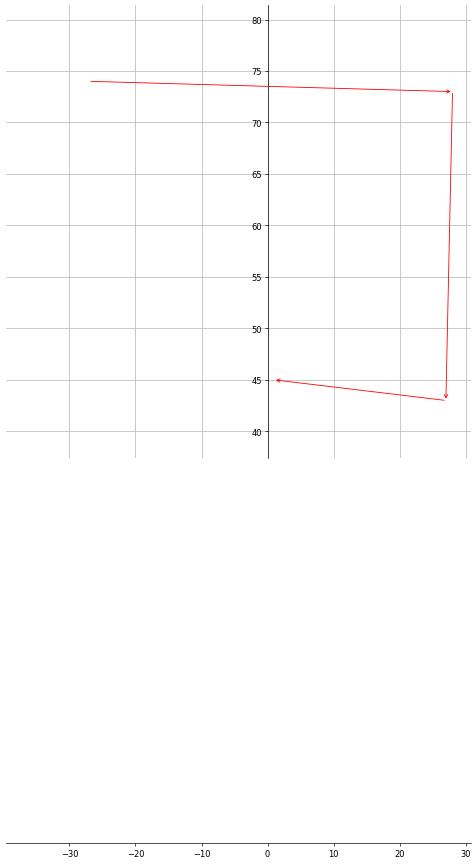

SSSM-000296


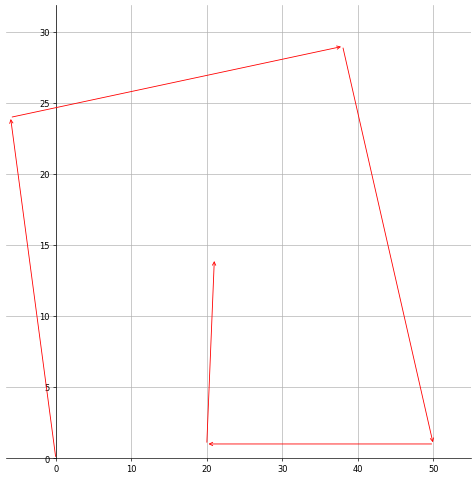

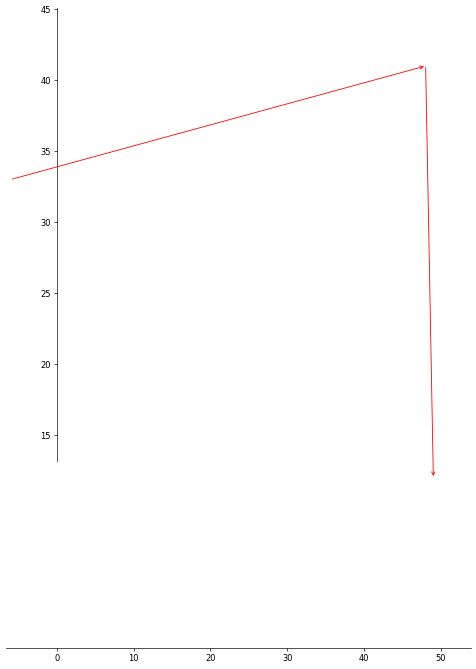

SSSM-B3-00031


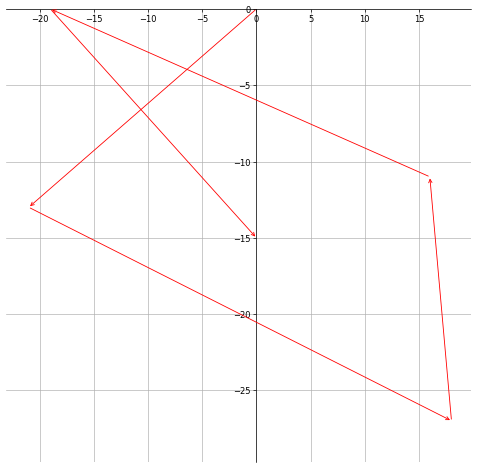

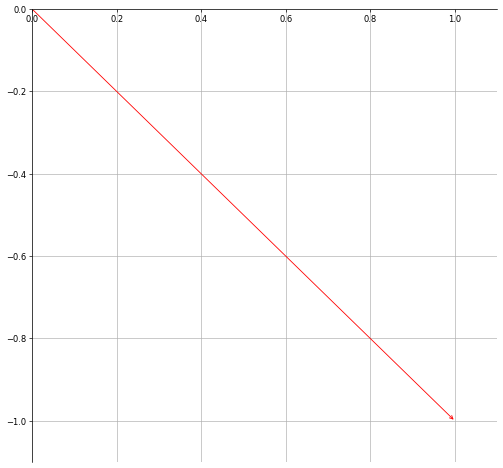

SSSM-B3-00032


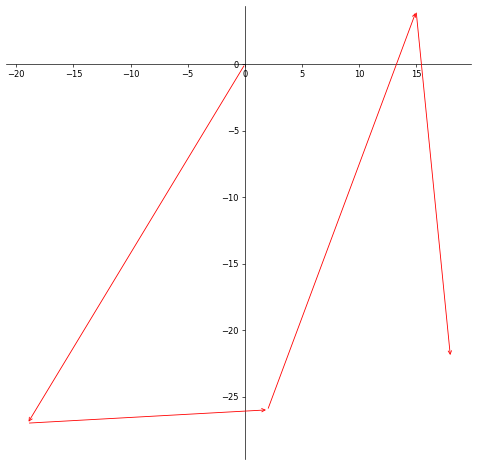

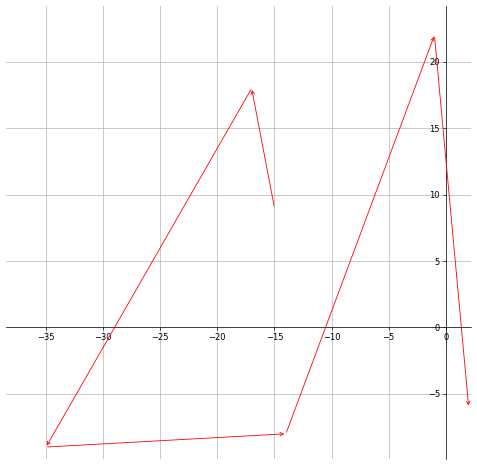

SSSM-B3-00033


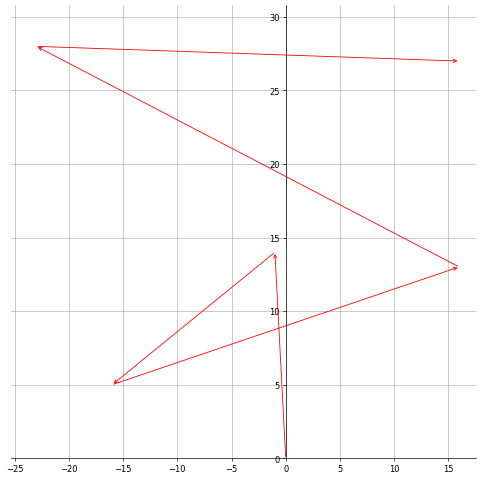

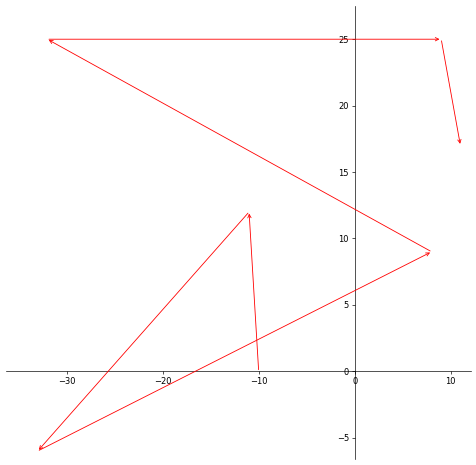

SSSM-B3-00034


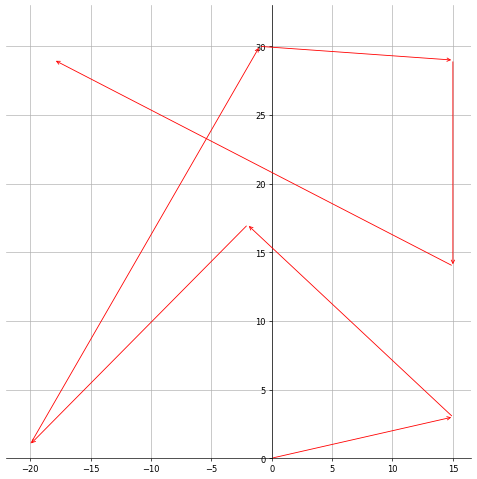

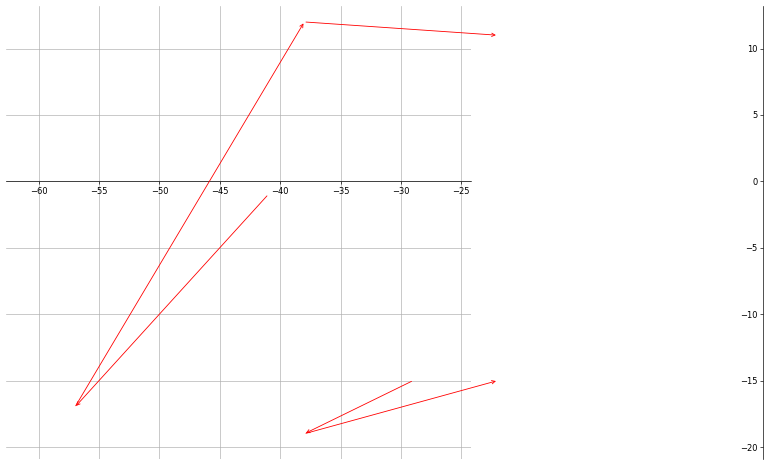

SSSM-B3-00035


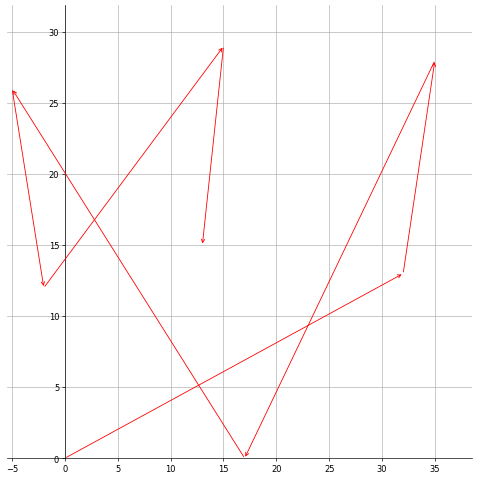

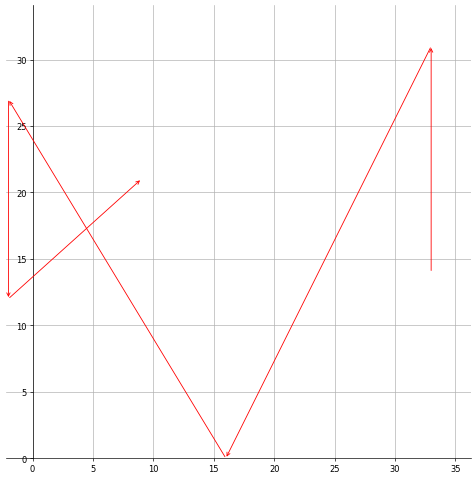

SSSM-B3-00036


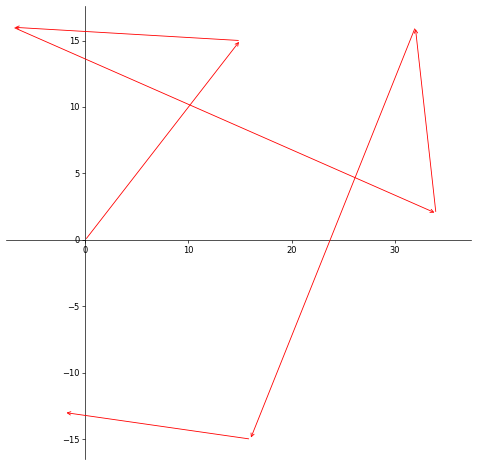

/home/user/anaconda3/envs/tensorflow-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.


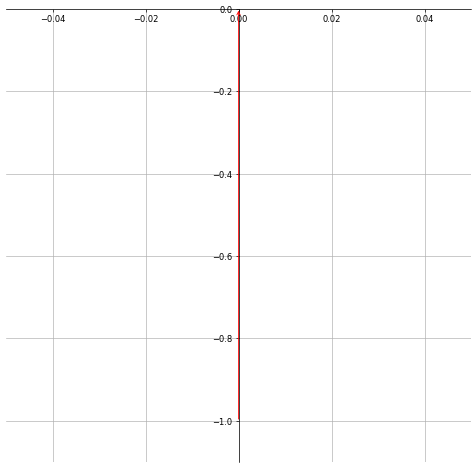

SSSM-B3-00037


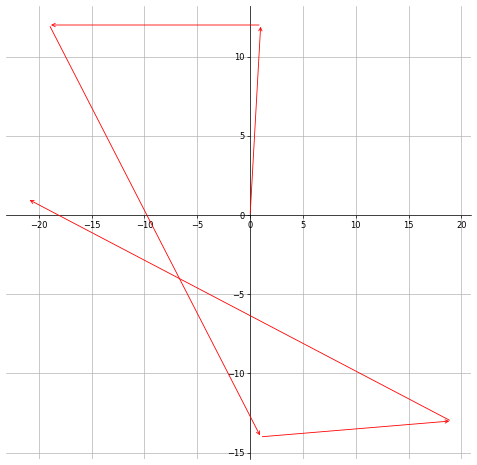

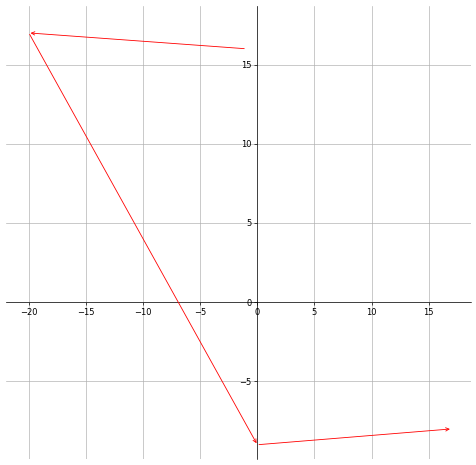

SSSM-B3-00038


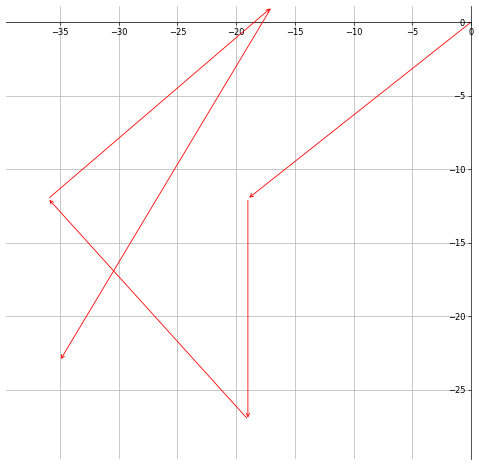

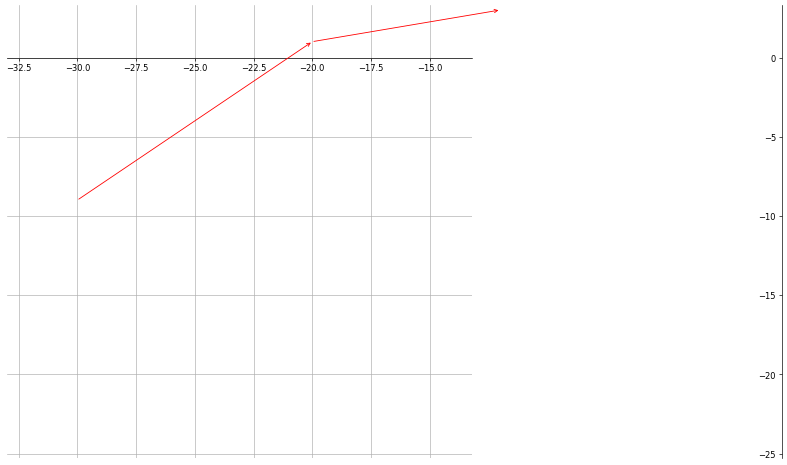

SSSM-B3-00039


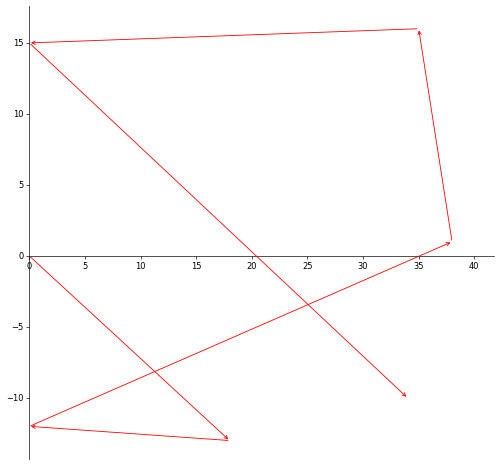

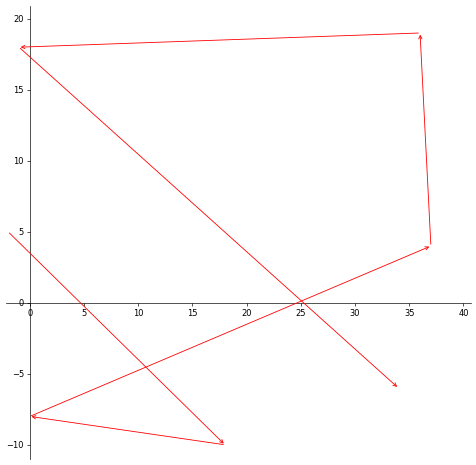

SSSM-B3-00040


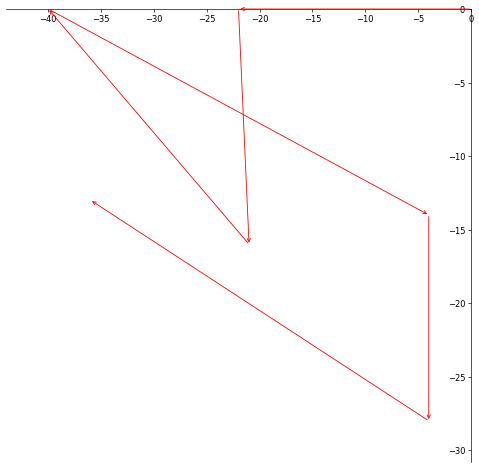

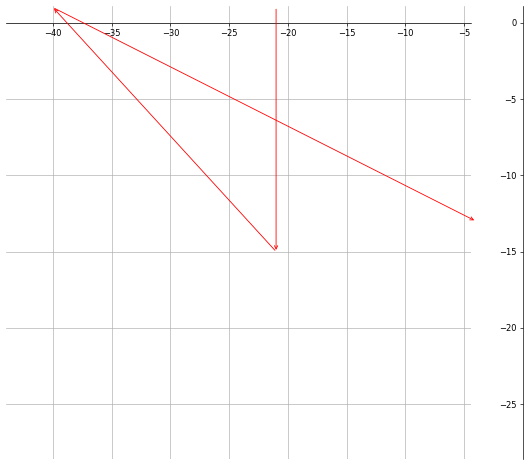

SSSM-B3-00041


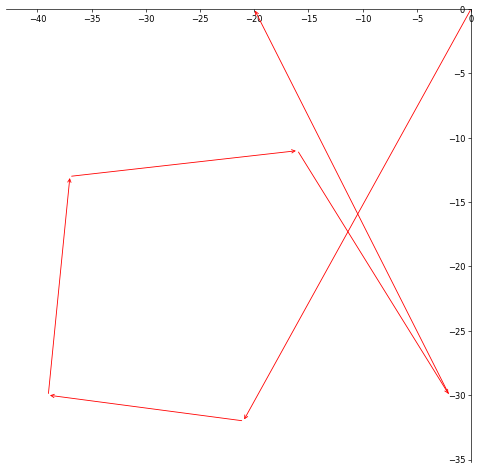

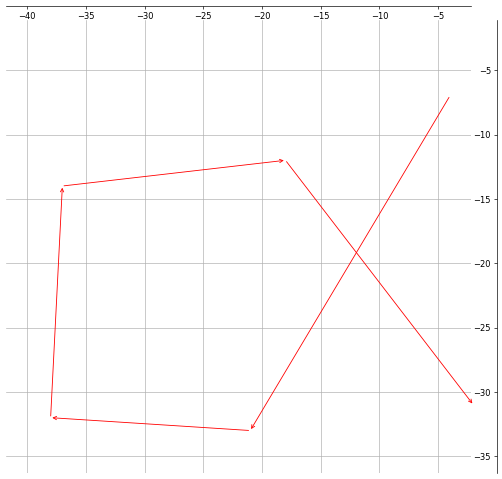

SSSM-B3-00042


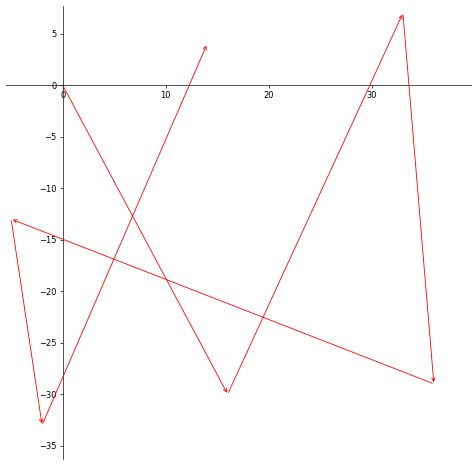

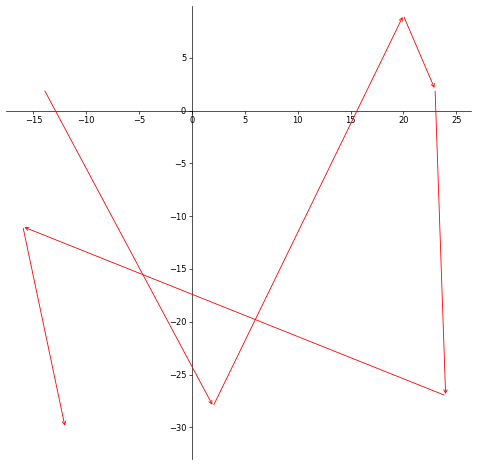

SSSM-B3-00043


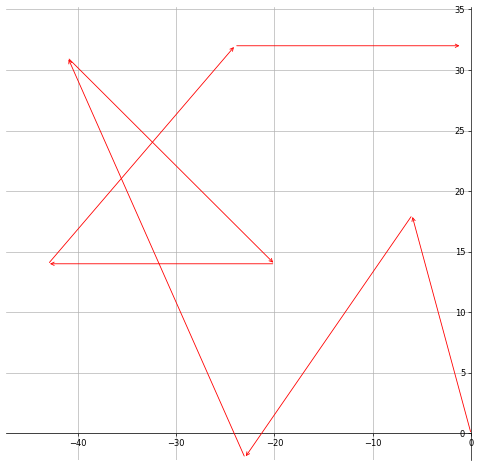

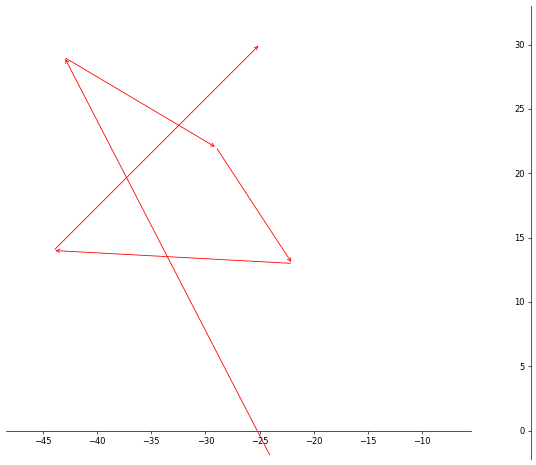

SSSM-B3-00044


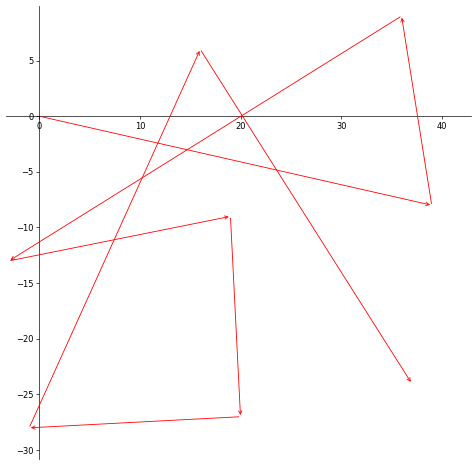

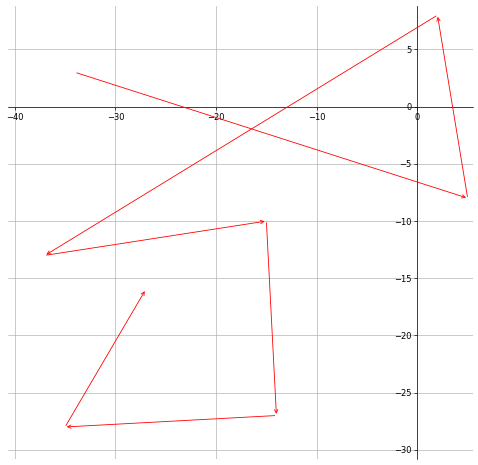

SSSM-B3-00045


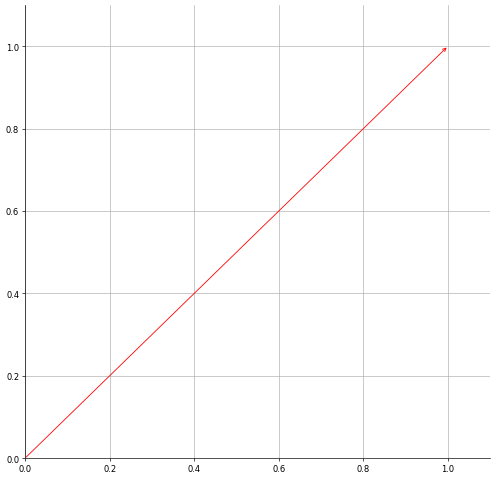

/home/user/anaconda3/envs/tensorflow-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


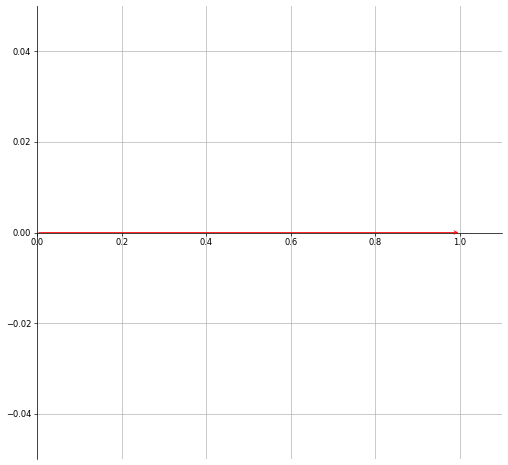

SSSM-B3-00046


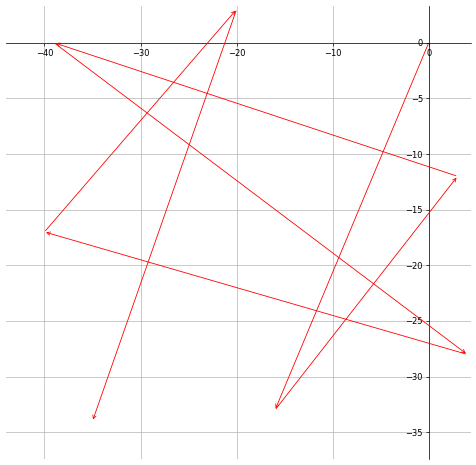

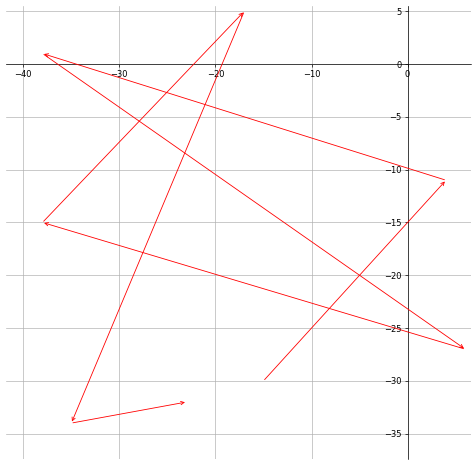

SSSM-B3-00047


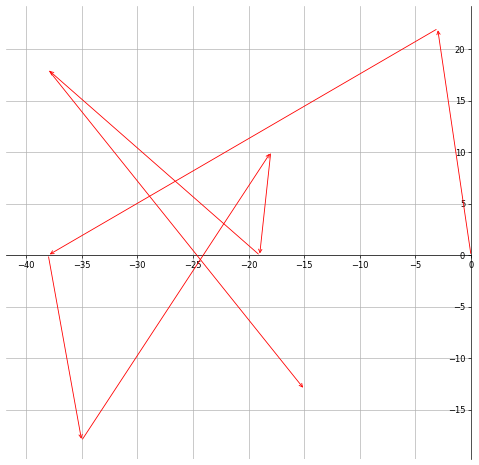

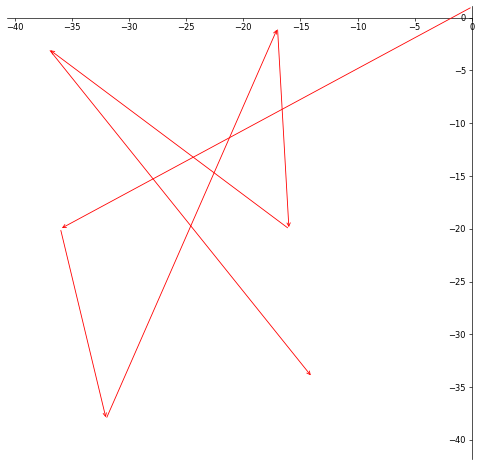

SSSM-B3-00048


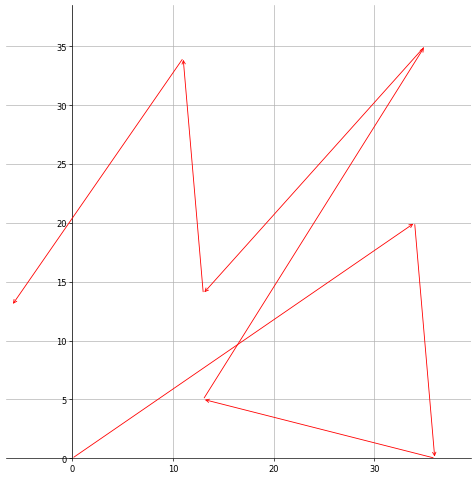

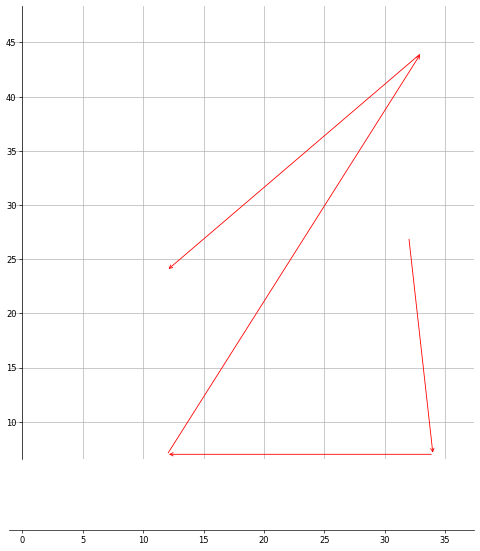

SSSM-B3-00049


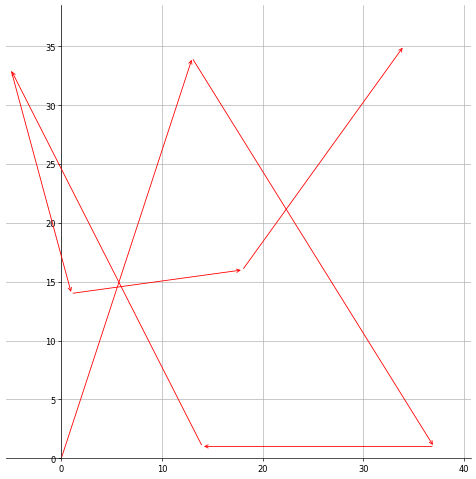

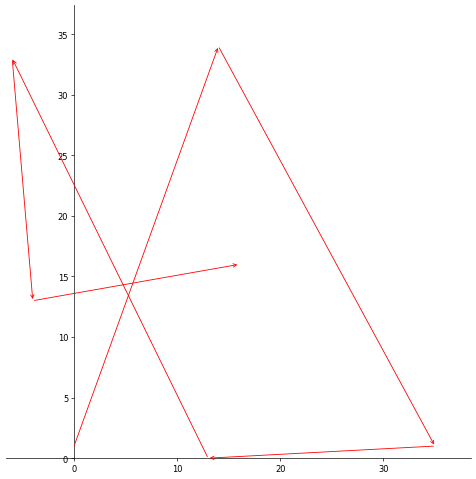

SSSM-B3-00050


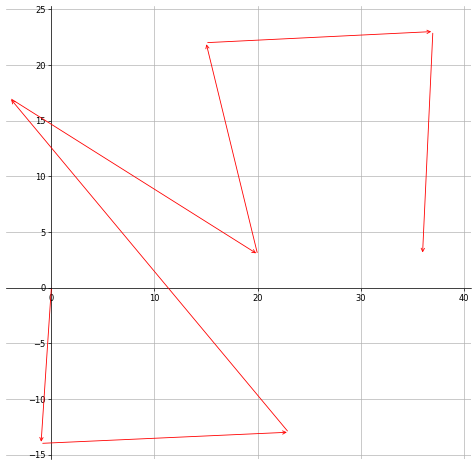

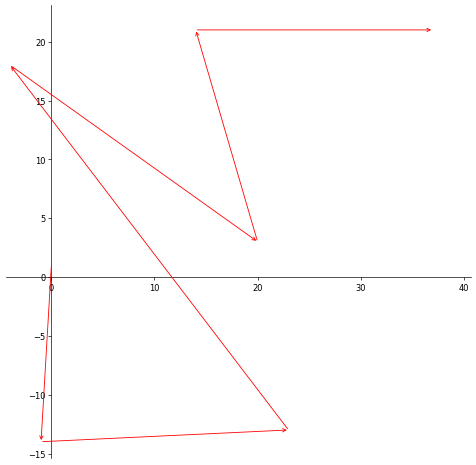

SSSM-B3-00051


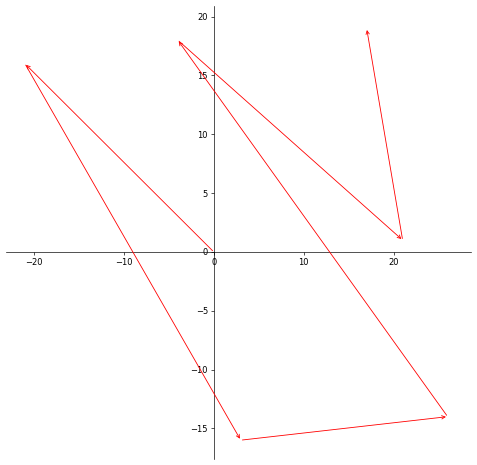

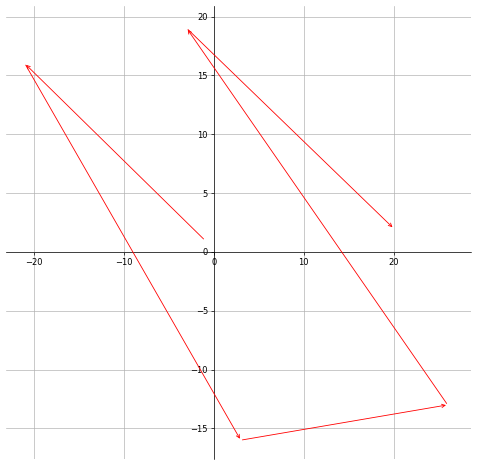

SSSM-B3-00052


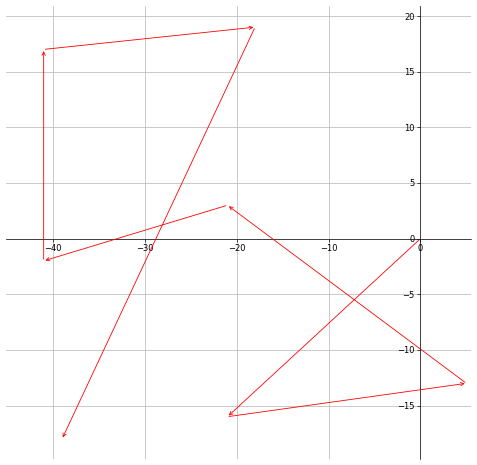

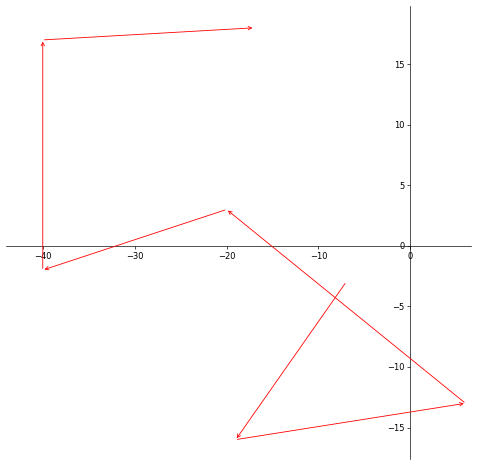

SSSM-B3-00053


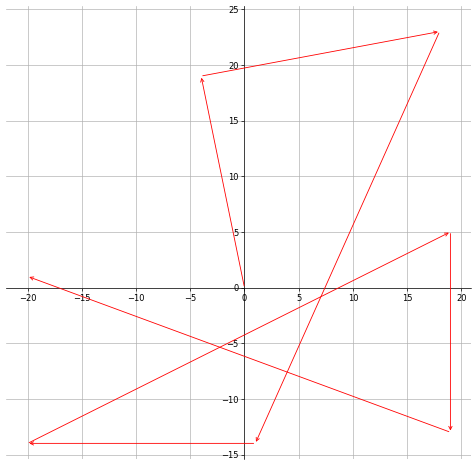

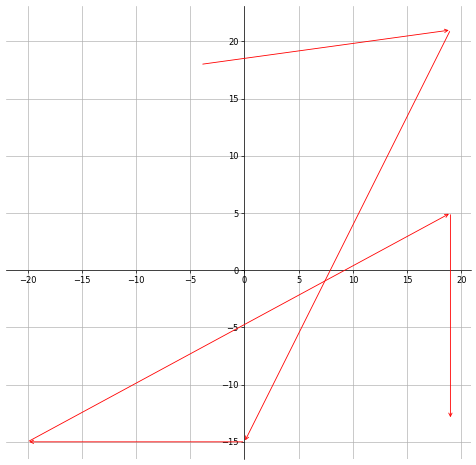

SSSM-B3-00054


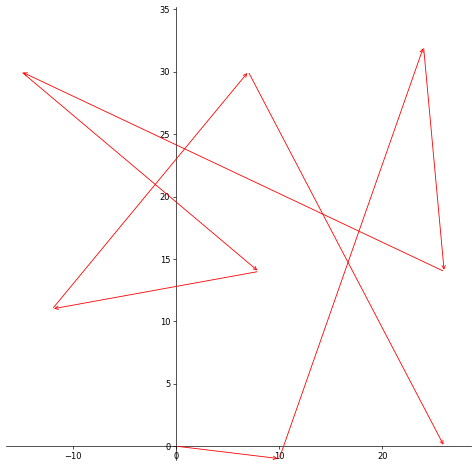

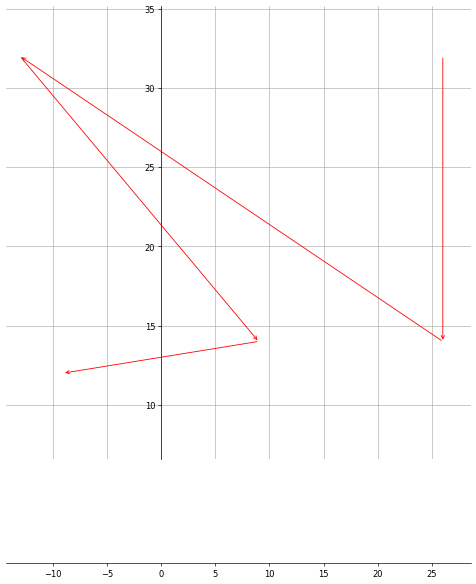

SSSM-B3-00055


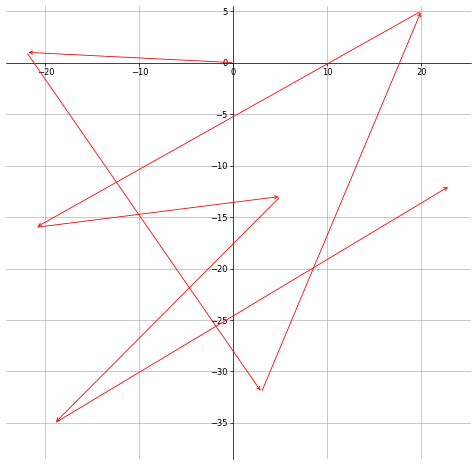

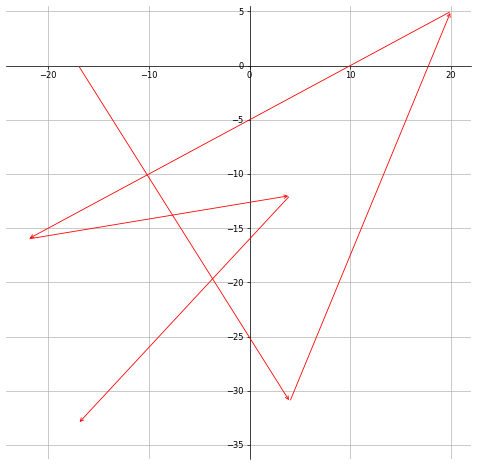

SSSM-B3-00056


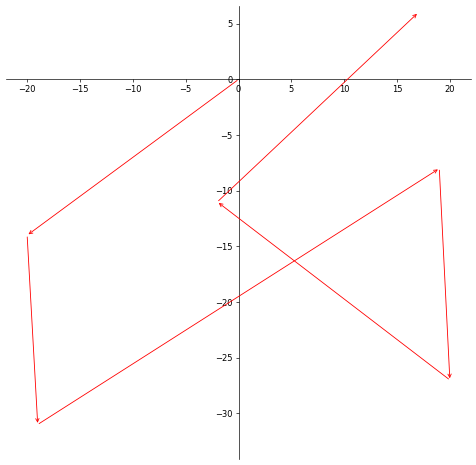

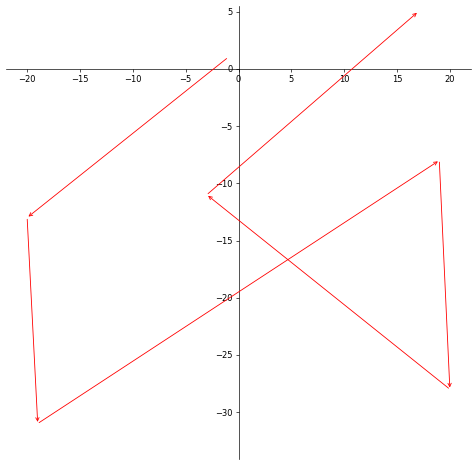

SSSM-B3-00057


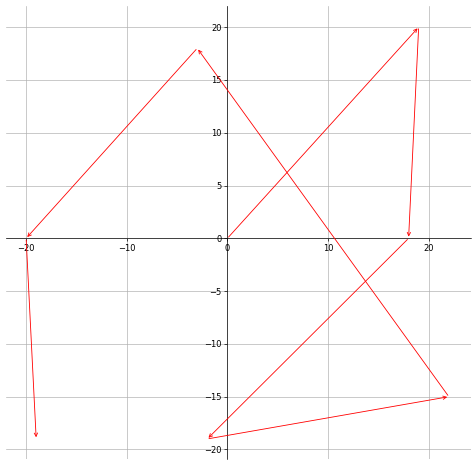

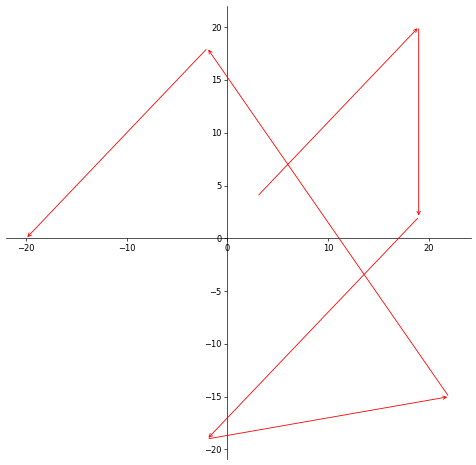

SSSM-B3-00058


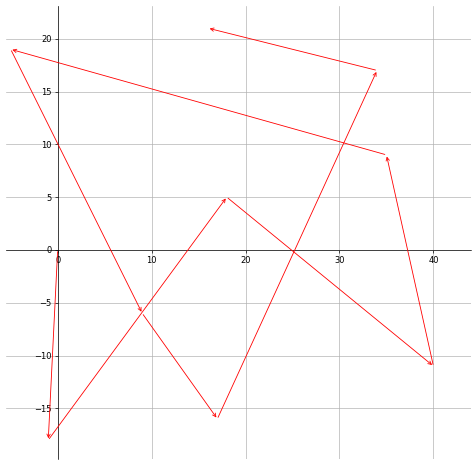

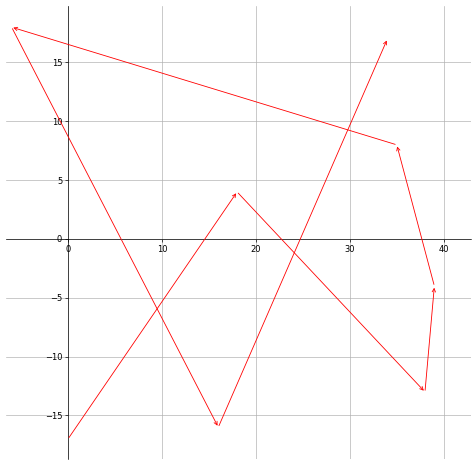

SSSM-B3-00059


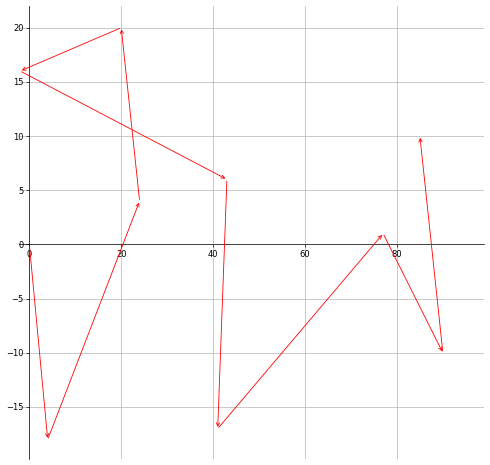

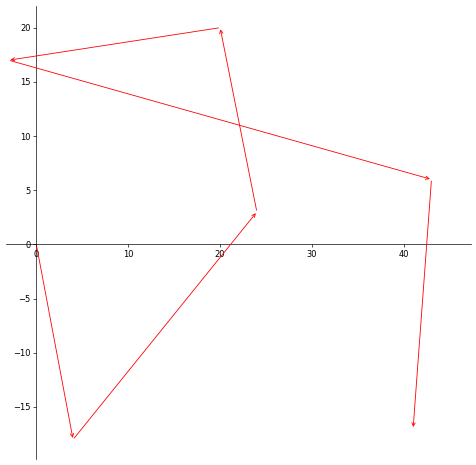

SSSM-B3-00060


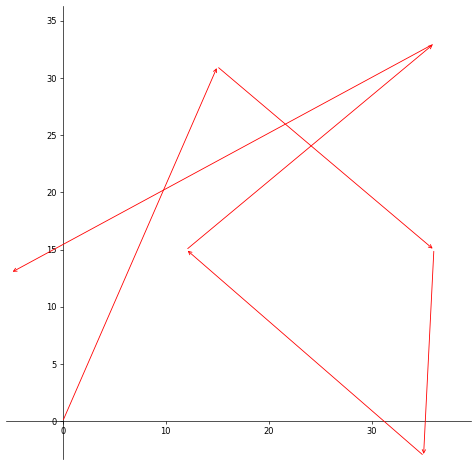

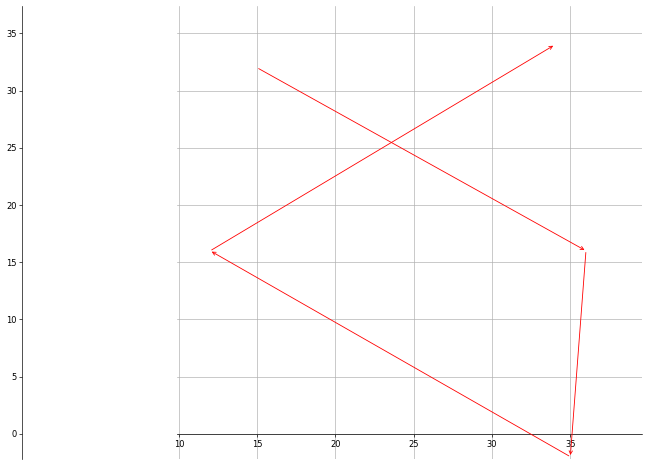

SSSM-B3-00061


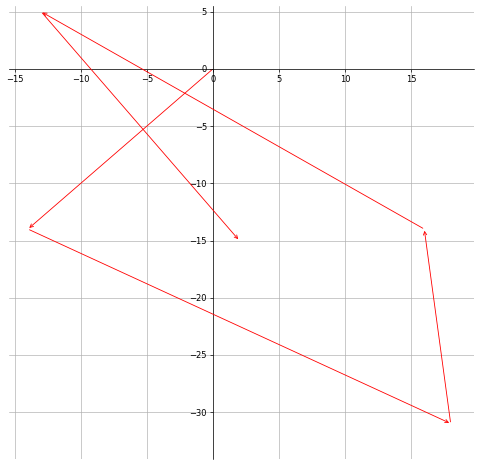

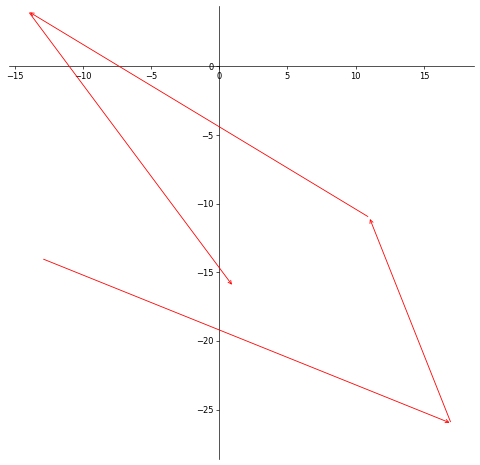

SSSM-B3-00062


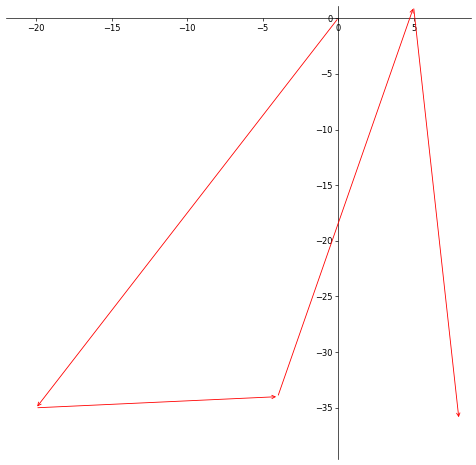

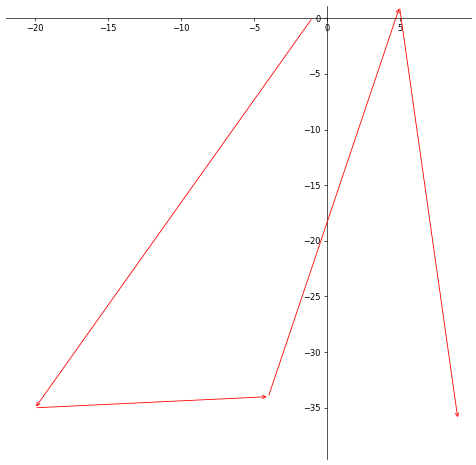

SSSM-B3-00063


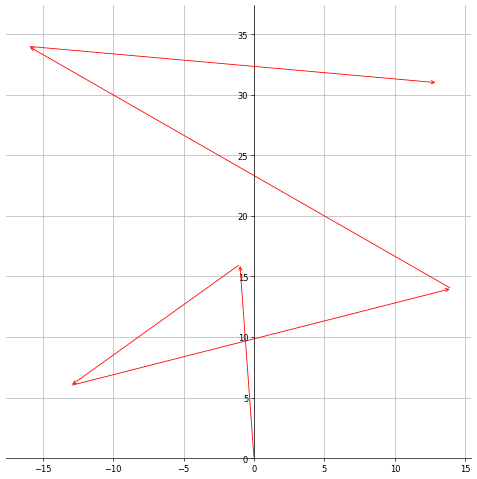

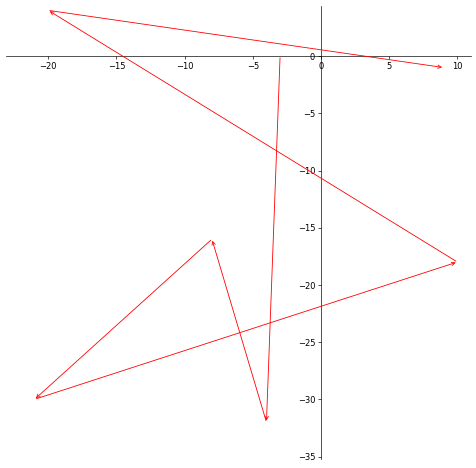

SSSM-B3-00064


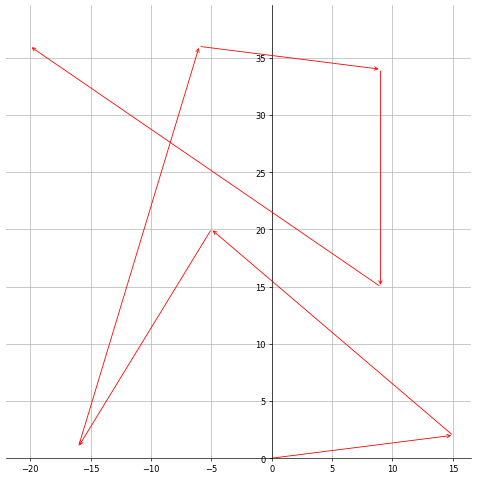

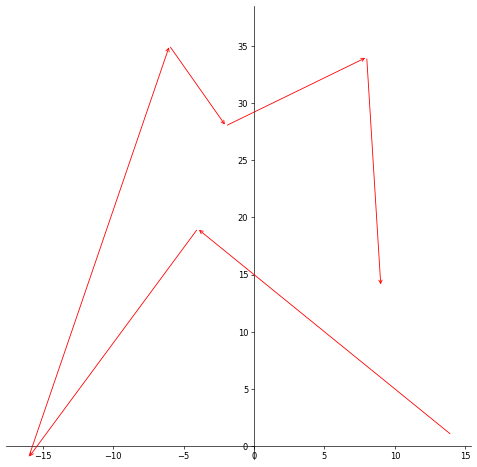

SSSM-B3-00066


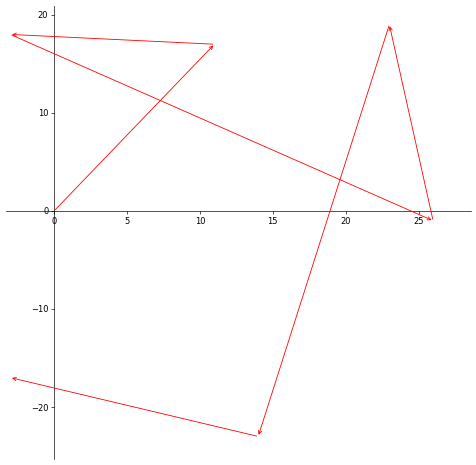

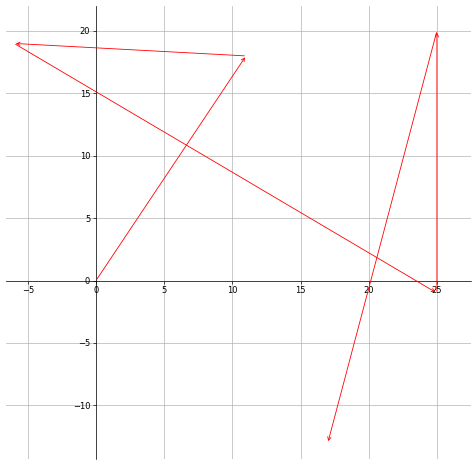

SSSM-B3-00067


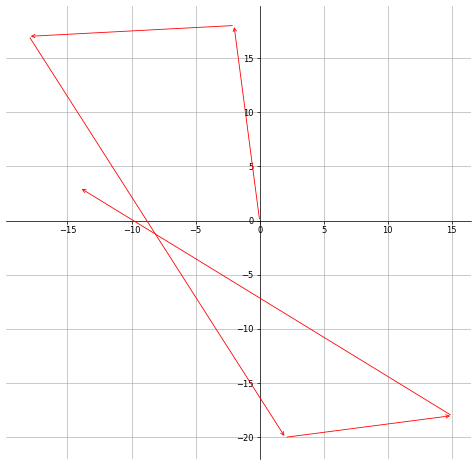

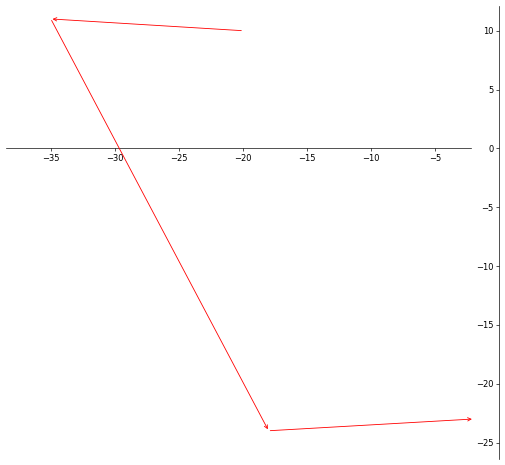

SSSM-B3-00068


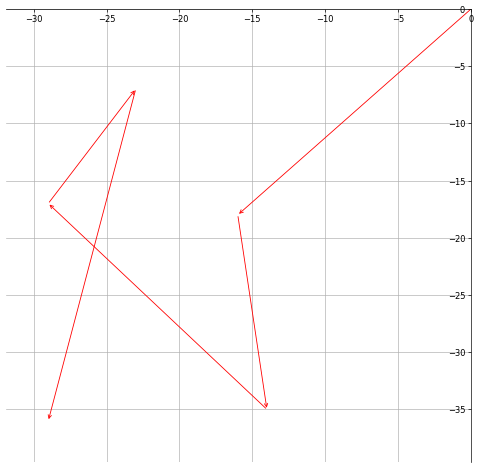

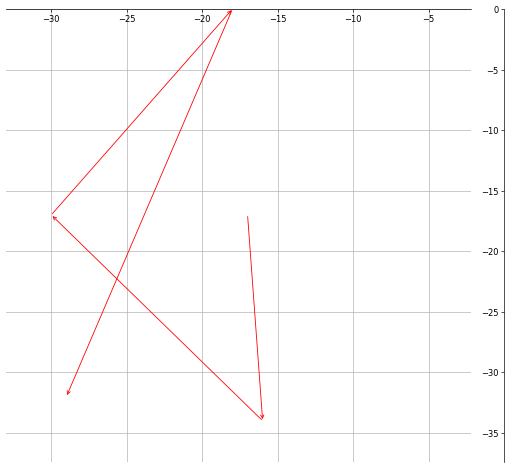

SSSM-B3-00069


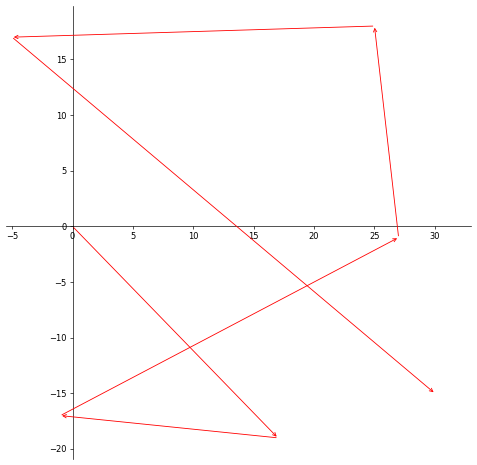

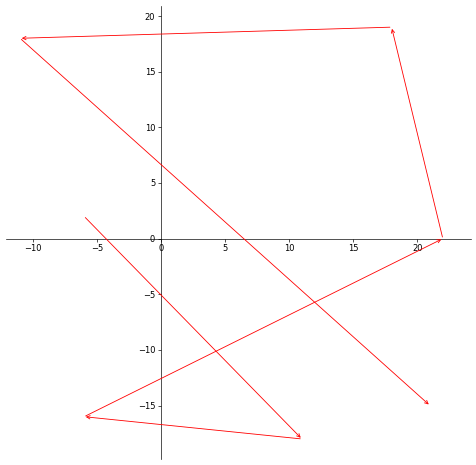

SSSM-B3-00070


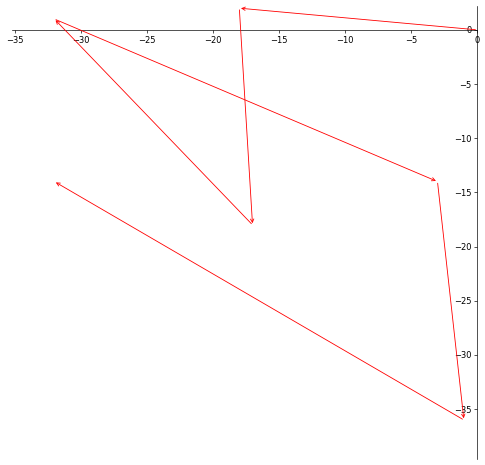

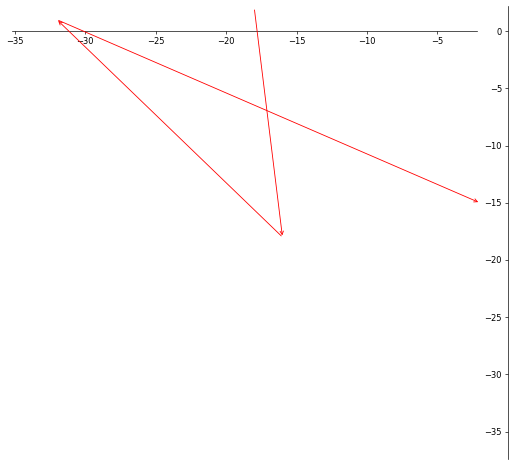

SSSM-B3-00071


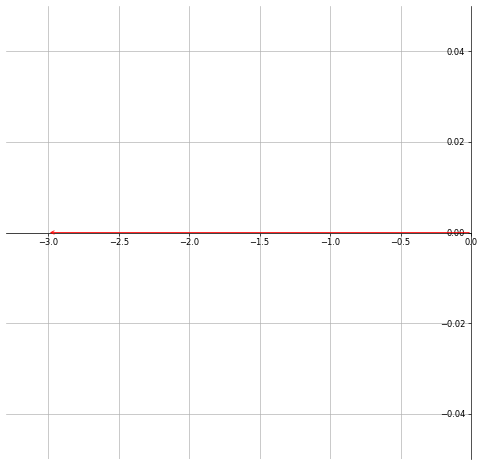

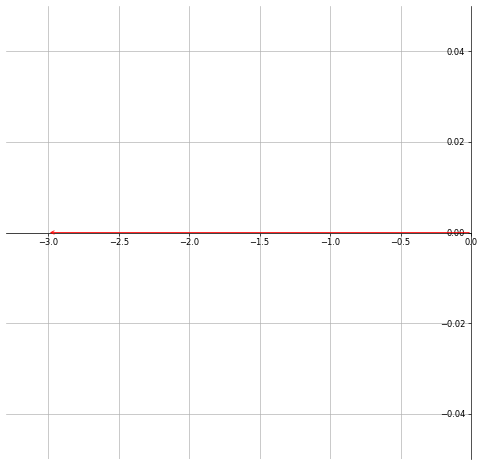

SSSM-B3-00072


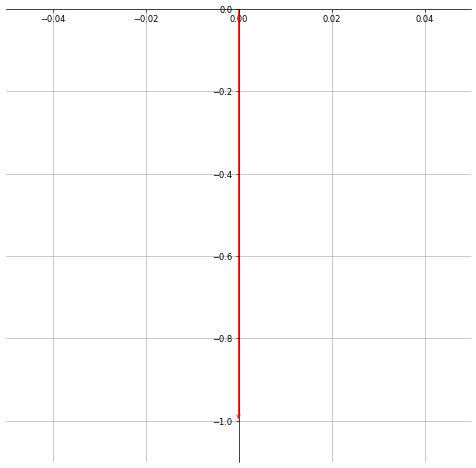

/home/user/anaconda3/envs/tensorflow-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Attempting to set identical bottom == top == -1.1 results in singular transformations; automatically expanding.


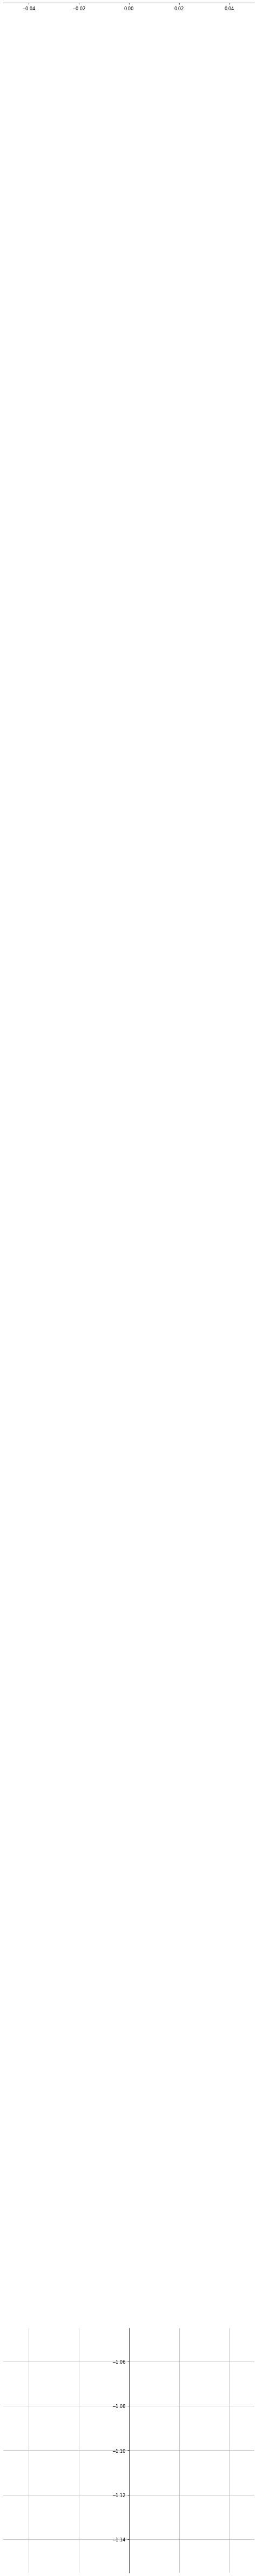

SSSM-B3-00073


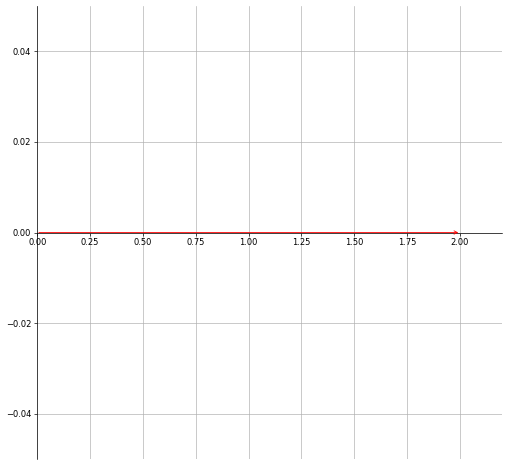

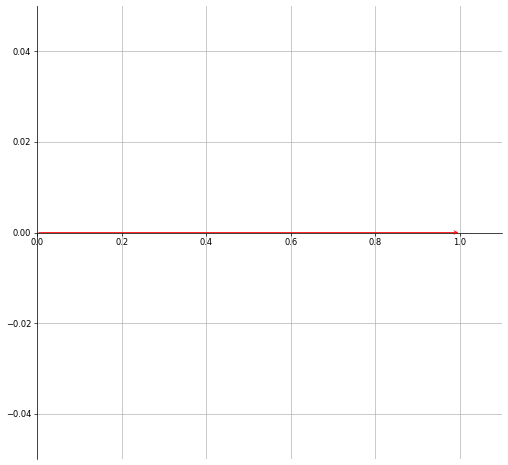

SSSM-B3-00074


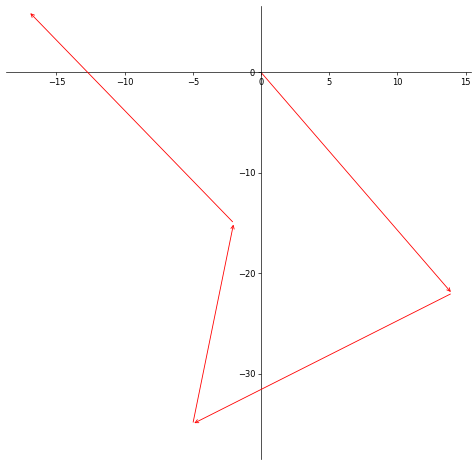

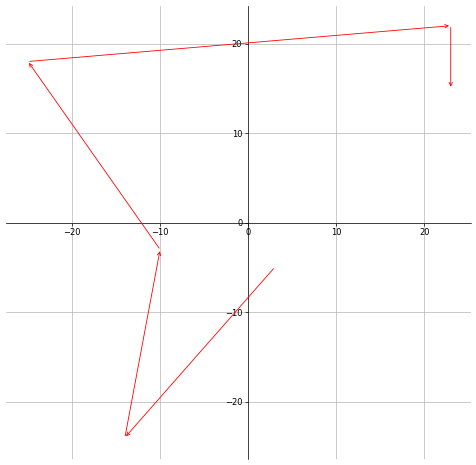

SSSM-B3-00075


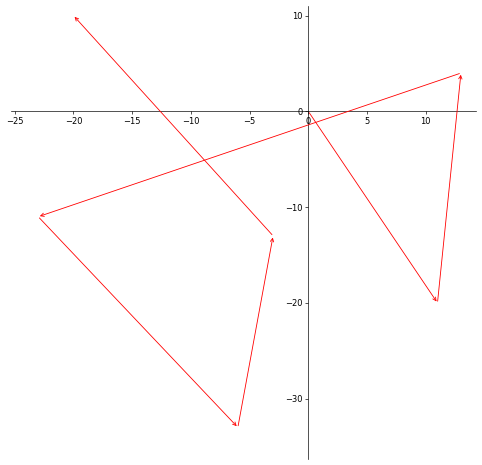

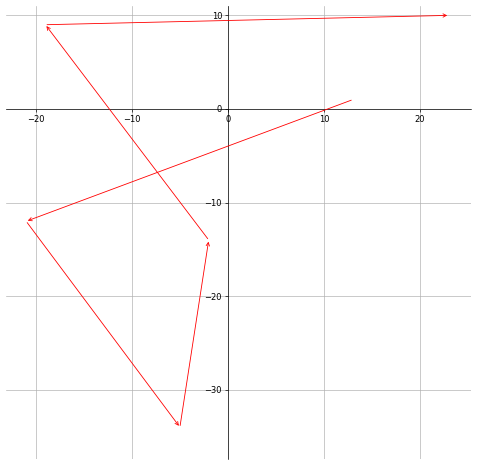

SSSM-B3-00077


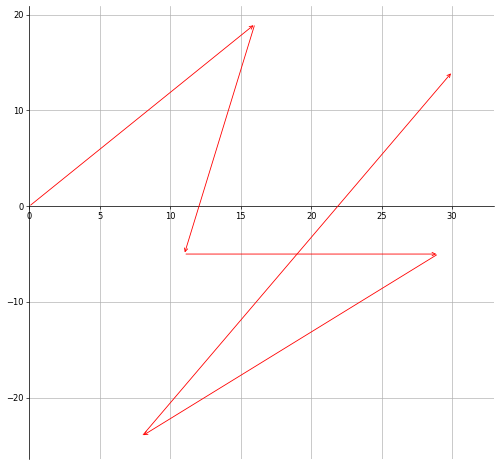

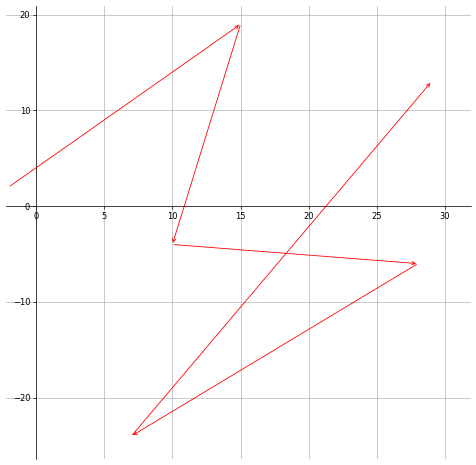

SSSM-B3-00078


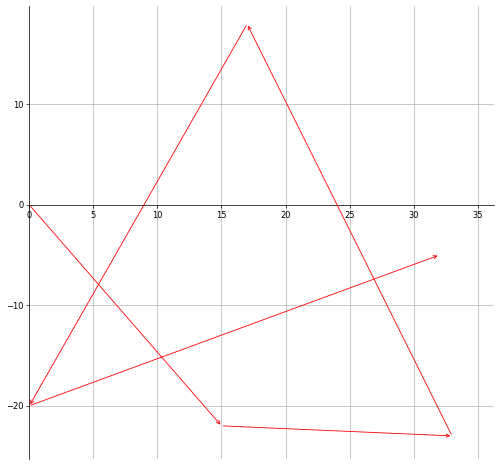

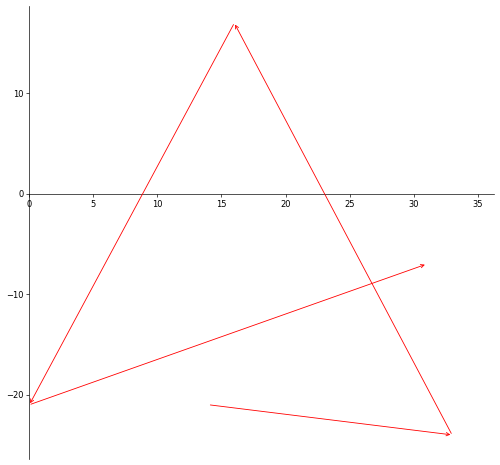

SSSM-B3-00079


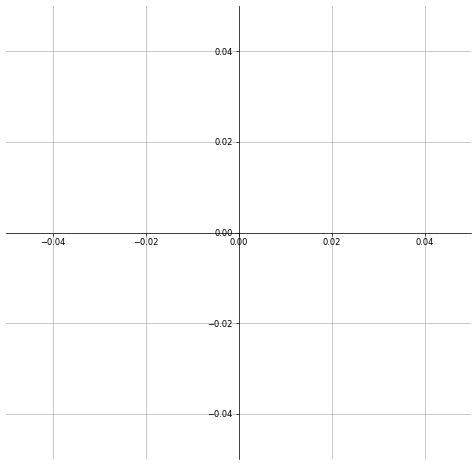

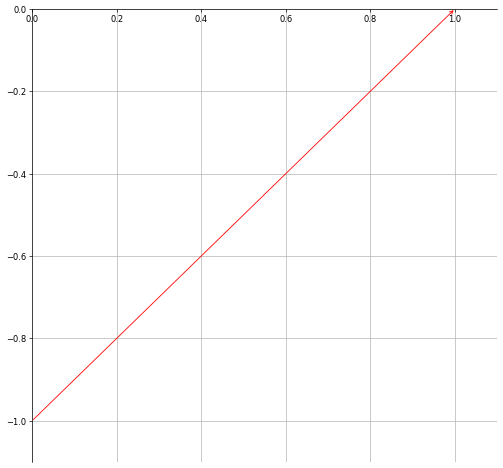

SSSM-B3-00080


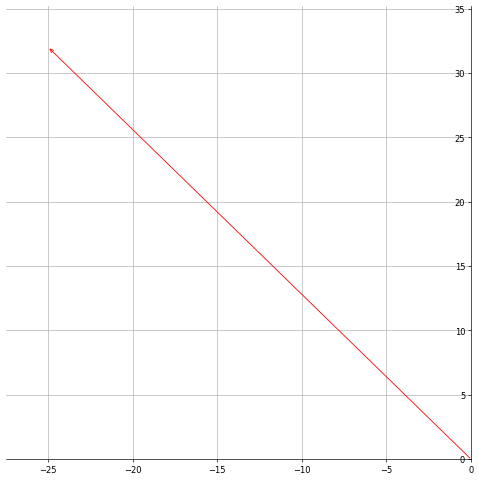

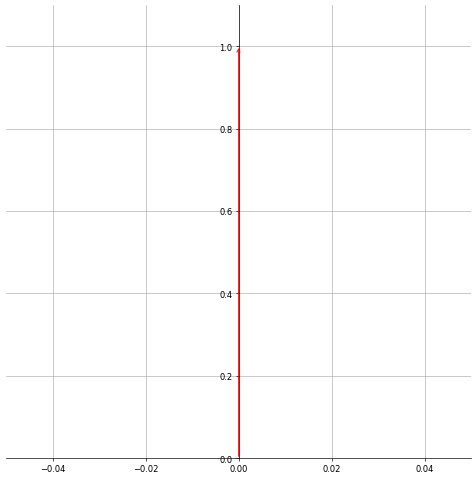

SSSM-B3-00081


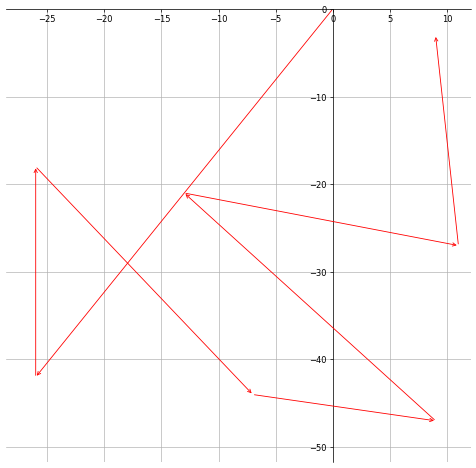

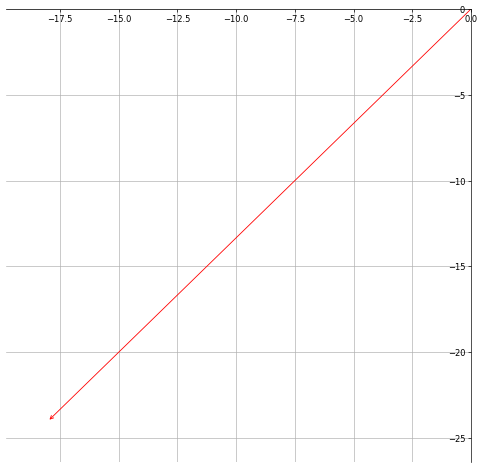

SSSM-B3-00082


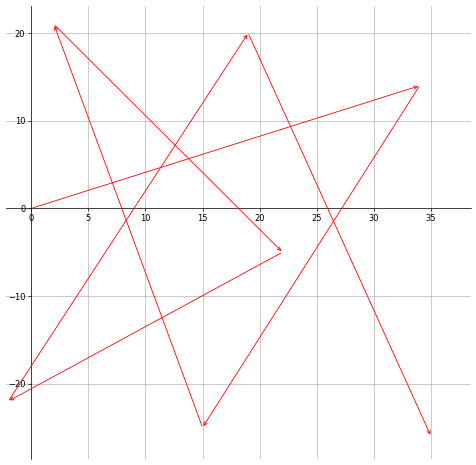

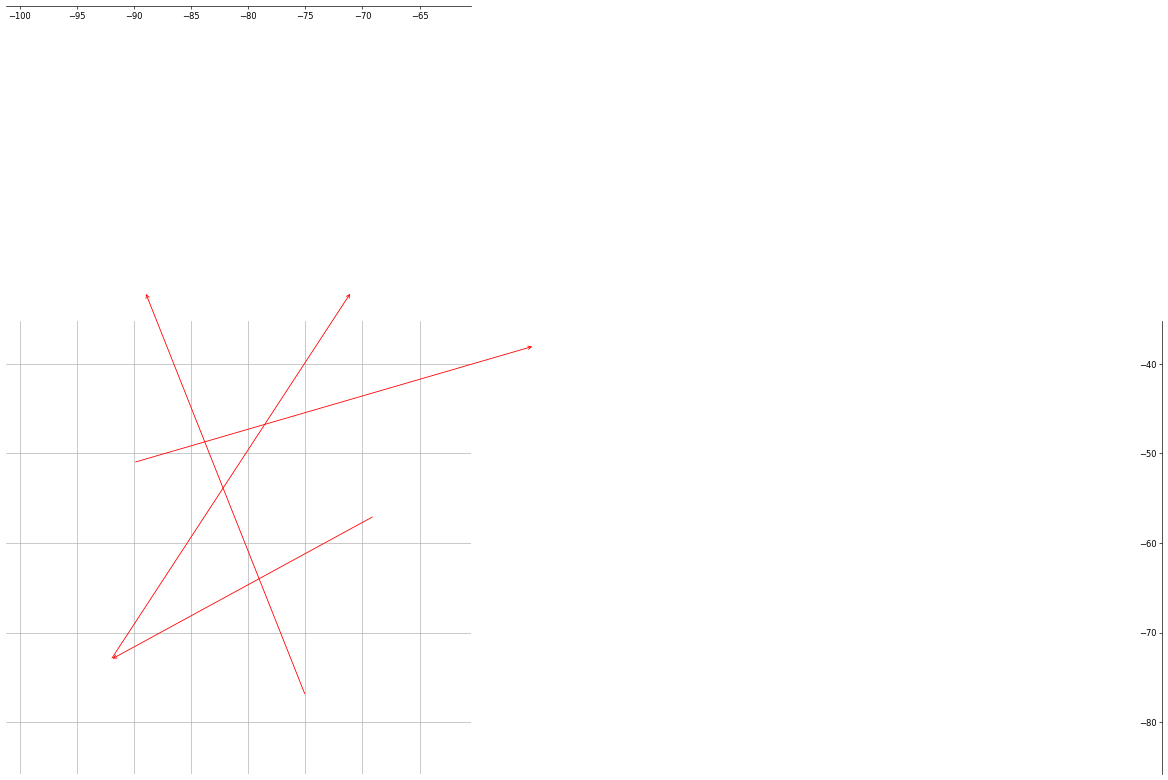

SSSM-B3-00083


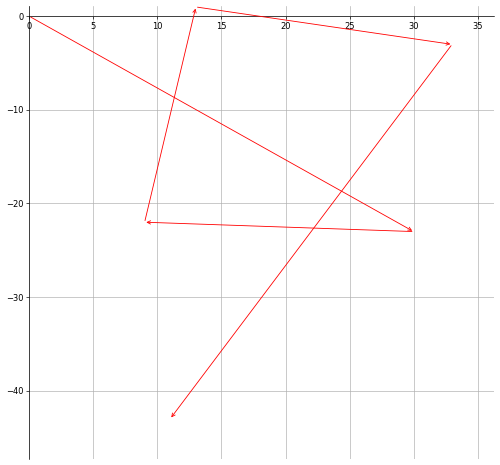

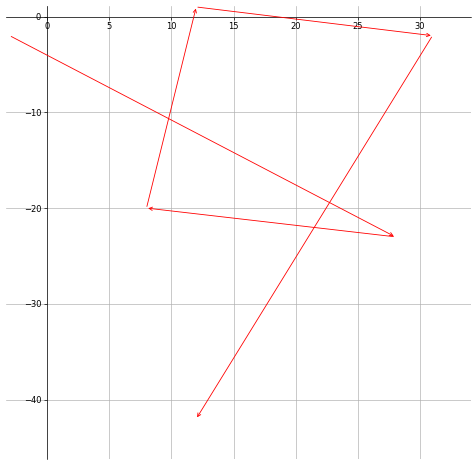

SSSM-B3-00085


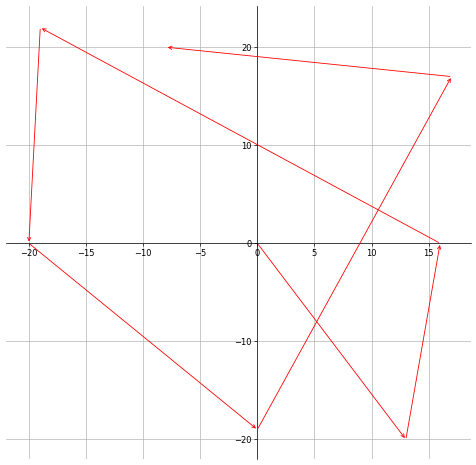

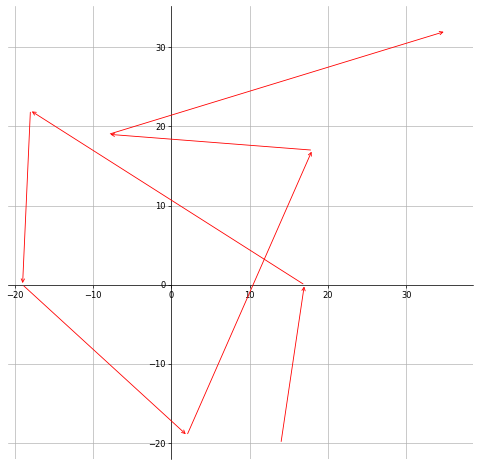

SSSM-B3-00086


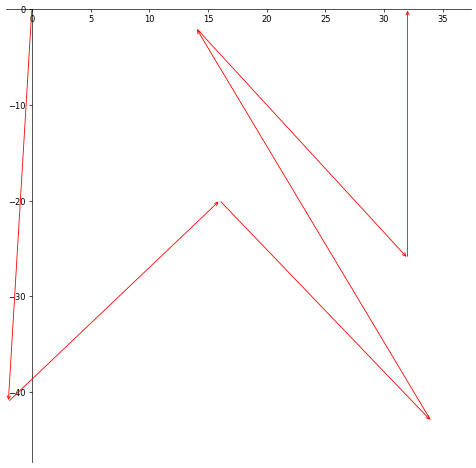

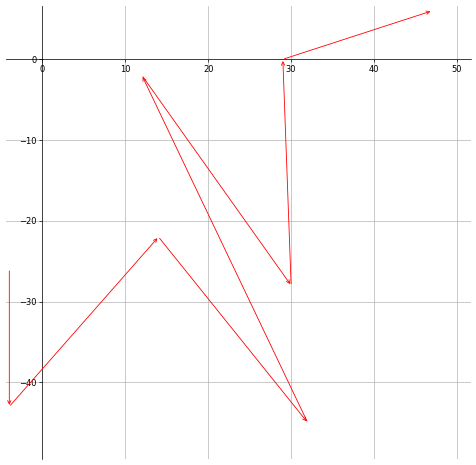

SSSM-B3-00087


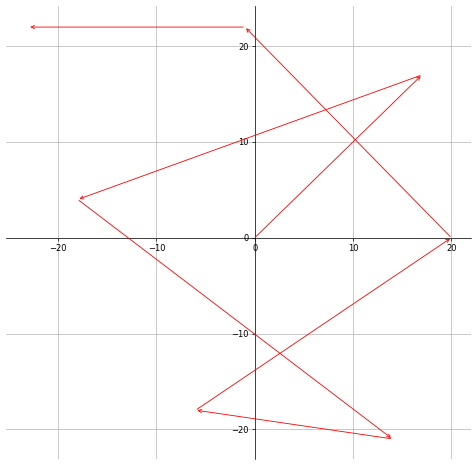

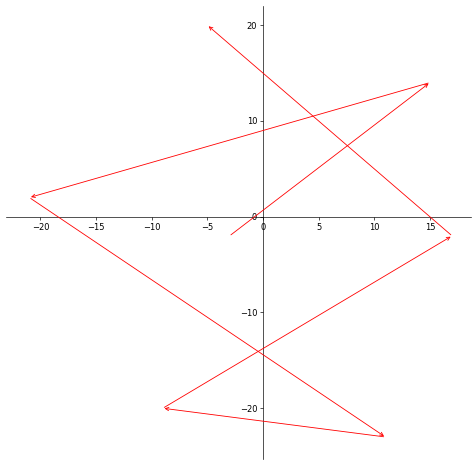

SSSM-B3-00088


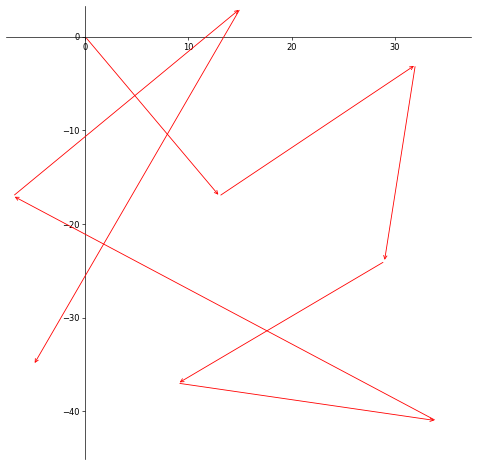

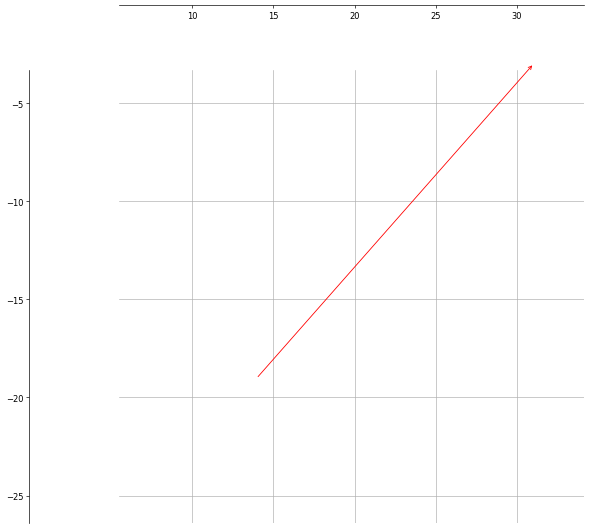

SSSM-B3-00090


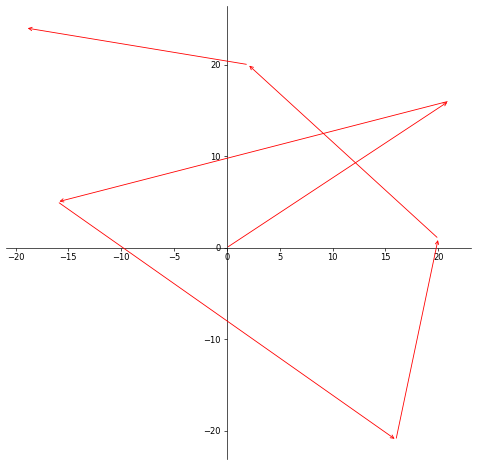

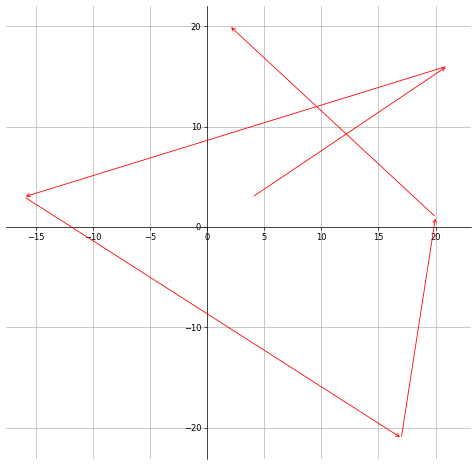

no-end.zip


In [88]:
# Test For Jason
for video_name in sorted(os.listdir("./results/no-end"))[:-1]:
    print(video_name)
    dp_path = f"./results/s1/{video_name}/dp.csv"
    opt_path = f"./results/no-end/{video_name}/opt_tra.csv"
    if os.path.exists(dp_path) and os.path.exists(opt_path):
        arrow(dp_path)
        arrow(opt_path)